In [1]:
import pandas as pd
import os

In [3]:
pwd

'C:\\Users\\mahir\\Dissertation'

In [5]:
# Load the dataset from the provided file path
file_path_A = r'C:\\Users\\mahir/Dissertation/data.csv'
df1 = pd.read_csv(file_path_A)
file_path_B = r'C:\\Users\\mahir/Dissertation/sp500wiki.csv'
df2 = pd.read_csv(file_path_B)


In [7]:
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df1.head())

# Check the structure of the dataset, including data types and non-null values
print("\nDataset Info:")
print(df1.info())

# Generate basic statistical summaries for the dataset
print("\nDataset Description:")
print(df1.describe())

First 5 rows of the dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2020-09-30  160.929993  163.100006  158.610001  160.179993  150.921692   
1  2020-10-01  160.669998  161.899994  157.720001  158.789993  149.612045   
2  2020-10-02  156.470001  161.940002  156.250000  160.360001  151.091309   
3  2020-10-05  162.250000  163.500000  161.759995  162.750000  153.343170   
4  2020-10-06  163.440002  165.699997  161.830002  162.229996  152.853195   

      Volume Symbol Security  GICS Sector  ... News - Analyst Comments  \
0  3056900.0    MMM       3M  Industrials  ...                     NaN   
1  1989100.0    MMM       3M  Industrials  ...                     4.0   
2  1768600.0    MMM       3M  Industrials  ...                     2.0   
3  1457000.0    MMM       3M  Industrials  ...                     2.0   
4  2021900.0    MMM       3M  Industrials  ...                     3.0   

   News - Stocks  News - Dividends  News - Corporate Earnings  

In [9]:
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df2.head())

# Check the structure of the dataset, including data types and non-null values
print("\nDataset Info:")
print(df2.info())

# Generate basic statistical summaries for the dataset
print("\nDataset Description:")
print(df2.describe())

First 5 rows of the dataset:
   Unnamed: 0 Symbol     Security SEC filings  GICS Sector  \
0           0    MMM           3M     reports  Industrials   
1           1    AOS  A. O. Smith     reports  Industrials   
2           2    ABT       Abbott     reports  Health Care   
3           3   ABBV       AbbVie     reports  Health Care   
4           4   ABMD      Abiomed     reports  Health Care   

          GICS Sub-Industry    Headquarters Location Date first added  \
0  Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09   
1         Building Products     Milwaukee, Wisconsin       2017-07-26   
2     Health Care Equipment  North Chicago, Illinois       1964-03-31   
3           Pharmaceuticals  North Chicago, Illinois       2012-12-31   
4     Health Care Equipment   Danvers, Massachusetts       2018-05-31   

       CIK      Founded Wikidata ID  
0    66740         1902     Q159433  
1    91142         1916    Q4648219  
2     1800         1888     Q306764  
3  1551

In [11]:
# Merge df1 and df2 on 'Symbol' using a left join
merged_dataset = df1.merge(df2, on="Symbol", how="left")


In [13]:
print("Total rows after merge:", len(merged_dataset))



Total rows after merge: 229718


In [15]:
print("Shape of the merged dataset:", merged_dataset.shape)

Shape of the merged dataset: (229718, 37)


In [17]:
print(merged_dataset.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol', 'Security_x', 'GICS Sector_x', 'GICS Sub-Industry_x', 'News - All News Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products', 'News - Layoffs', 'News - Analyst Comments', 'News - Stocks', 'News - Dividends', 'News - Corporate Earnings', 'News - Mergers & Acquisitions', 'News - Store Openings', 'News - Product Recalls', 'News - Adverse Events', 'News - Personnel Changes', 'News - Stock Rumors', 'Unnamed: 0', 'Security_y', 'SEC filings', 'GICS Sector_y', 'GICS Sub-Industry_y', 'Headquarters Location', 'Date first added', 'CIK', 'Founded', 'Wikidata ID']


In [19]:
# List of columns to keep based on your updated methodology
keep_columns = [
    'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'Symbol', 'GICS Sector_x', 'GICS Sub-Industry_x',
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment',
    'News - Analyst Comments', 'News - Corporate Earnings',
    'News - Dividends', 'News - Mergers & Acquisitions',
    'News - Layoffs', 'News - Product Recalls',
    'News - Adverse Events', 'News - Stock Rumors'
]

# Filter merged_dataset to keep only selected columns
merged_dataset = merged_dataset[keep_columns]

# Optional: rename GICS Sector/Sub-Industry for cleaner column names
merged_dataset = merged_dataset.rename(columns={
    'GICS Sector_x': 'GICS Sector',
    'GICS Sub-Industry_x': 'GICS Sub-Industry'
})

# Show a preview
merged_dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,GICS Sector,GICS Sub-Industry,...,News - Positive Sentiment,News - Negative Sentiment,News - Analyst Comments,News - Corporate Earnings,News - Dividends,News - Mergers & Acquisitions,News - Layoffs,News - Product Recalls,News - Adverse Events,News - Stock Rumors
0,2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,Industrials,Industrial Conglomerates,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,Industrials,Industrial Conglomerates,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,Industrials,Industrial Conglomerates,...,3.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,Industrials,Industrial Conglomerates,...,2.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,Industrials,Industrial Conglomerates,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0


In [21]:
# List all column names in the dataset
print("📋 Column Names in the dataset:")
print(merged_dataset.columns.tolist())

# Check the number of rows and columns
print("\n📏 Dataset Shape (Rows, Columns):")
print(merged_dataset.shape)

# For categorical columns, check how many unique values they have
print("\n🔍 Unique values in categorical columns:")
for col in merged_dataset.select_dtypes(include=['object']).columns:
    print(f"• '{col}': {merged_dataset[col].nunique()} unique values")


📋 Column Names in the dataset:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol', 'GICS Sector', 'GICS Sub-Industry', 'News - All News Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - Analyst Comments', 'News - Corporate Earnings', 'News - Dividends', 'News - Mergers & Acquisitions', 'News - Layoffs', 'News - Product Recalls', 'News - Adverse Events', 'News - Stock Rumors']

📏 Dataset Shape (Rows, Columns):
(229718, 22)

🔍 Unique values in categorical columns:
• 'Date': 441 unique values
• 'Symbol': 495 unique values
• 'GICS Sector': 11 unique values
• 'GICS Sub-Industry': 120 unique values


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


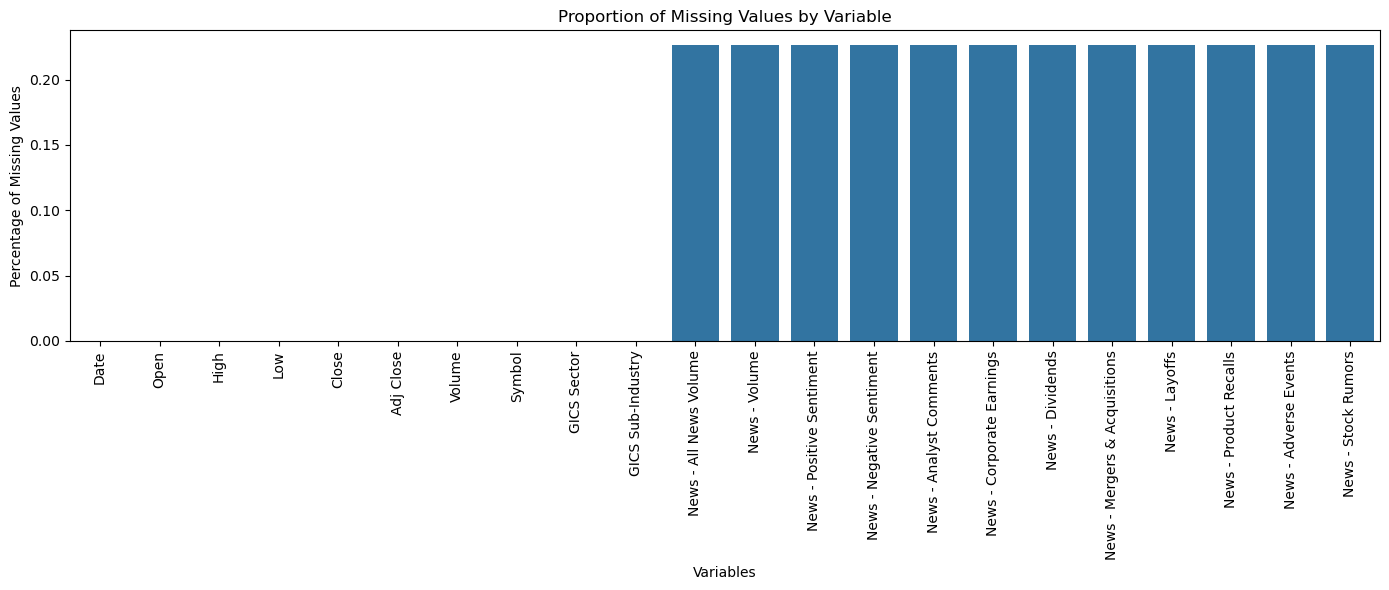

📊 Missing Value Overview (Descending Order):

                  column_name  percent_missing
                News - Volume         0.226364
    News - Positive Sentiment         0.226364
        News - Adverse Events         0.226364
       News - Product Recalls         0.226364
               News - Layoffs         0.226364
News - Mergers & Acquisitions         0.226364
             News - Dividends         0.226364
    News - Corporate Earnings         0.226364
      News - Analyst Comments         0.226364
    News - Negative Sentiment         0.226364
          News - Stock Rumors         0.226364
       News - All News Volume         0.226364
                         Open         0.000000
            GICS Sub-Industry         0.000000
                  GICS Sector         0.000000
                       Symbol         0.000000
                       Volume         0.000000
                    Adj Close         0.000000
                        Close         0.000000
              

In [23]:
# Install packages 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'df' with actual dataset name
df = merged_dataset

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a bar plot for missing values
plt.figure(figsize=(14, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.title("Proportion of Missing Values by Variable")
plt.tight_layout()
plt.show()

# Create and display a sorted dataframe of missing percentages
missing_data = pd.DataFrame({
    'column_name': missing_percentage.index,
    'percent_missing': missing_percentage.values
}).sort_values('percent_missing', ascending=False)

# Display the missing values in tabular format
print("📊 Missing Value Overview (Descending Order):\n")
print(missing_data.to_string(index=False))



In [24]:
# List of columns with missing values (optional: you can filter them programmatically too)
missing_columns = [
    'News - Volume', 'News - Positive Sentiment', 'News - Adverse Events',
    'News - Product Recalls', 'News - Layoffs', 'News - Mergers & Acquisitions',
    'News - Dividends', 'News - Corporate Earnings', 'News - Analyst Comments',
    'News - Negative Sentiment', 'News - Stock Rumors', 'News - All News Volume'
]

# Median imputation for missing values
for col in missing_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("✅ Missing values imputed using median strategy.")


✅ Missing values imputed using median strategy.


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\2213214796.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [27]:
# Recalculate the percentage of missing values for each column
missing_percentage_after = df.isnull().sum() / len(df) * 100

# Create a dataframe with the results, sorted in descending order
missing_data_after = pd.DataFrame({
    'column_name': missing_percentage_after.index,
    'percent_missing': missing_percentage_after.values
}).sort_values('percent_missing', ascending=False)

# Display the result
print("📊 Missing Value Percentage After Imputation:\n")
print(missing_data_after.to_string(index=False))


📊 Missing Value Percentage After Imputation:

                  column_name  percent_missing
                         Date              0.0
                         Open              0.0
        News - Adverse Events              0.0
       News - Product Recalls              0.0
               News - Layoffs              0.0
News - Mergers & Acquisitions              0.0
             News - Dividends              0.0
    News - Corporate Earnings              0.0
      News - Analyst Comments              0.0
    News - Negative Sentiment              0.0
    News - Positive Sentiment              0.0
                News - Volume              0.0
       News - All News Volume              0.0
            GICS Sub-Industry              0.0
                  GICS Sector              0.0
                       Symbol              0.0
                       Volume              0.0
                    Adj Close              0.0
                        Close              0.0
              

In [29]:
# Show remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(df.columns.tolist())

Remaining columns after dropping unnecessary ones:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol', 'GICS Sector', 'GICS Sub-Industry', 'News - All News Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - Analyst Comments', 'News - Corporate Earnings', 'News - Dividends', 'News - Mergers & Acquisitions', 'News - Layoffs', 'News - Product Recalls', 'News - Adverse Events', 'News - Stock Rumors']


In [31]:
# 1. Show current DataFrame structure (data types, non-null counts)
print("Current DataFrame structure:")
print(df.info())

# 2. Show summary statistics for all columns, including categorical and numerical
print("\nSummary statistics of the DataFrame:")
print(df.describe(include='all'))

# 3. Calculate percentage of missing values per column
missing_percentage = df.isnull().sum() / len(df) * 100

# 4. Create a dataframe to neatly display missing data sorted by highest missing percentage
missing_data = pd.DataFrame({
    'column_name': missing_percentage.index,
    'percent_missing': missing_percentage.values
}).sort_values('percent_missing', ascending=False)




Current DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229718 entries, 0 to 229717
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           229718 non-null  object 
 1   Open                           229718 non-null  float64
 2   High                           229718 non-null  float64
 3   Low                            229718 non-null  float64
 4   Close                          229718 non-null  float64
 5   Adj Close                      229718 non-null  float64
 6   Volume                         229718 non-null  float64
 7   Symbol                         229718 non-null  object 
 8   GICS Sector                    229718 non-null  object 
 9   GICS Sub-Industry              229718 non-null  object 
 10  News - All News Volume         229718 non-null  float64
 11  News - Volume                  229718 non-null  float64
 12  N

In [33]:
# Display the entire DataFrame
print(df)

              Date        Open        High         Low       Close  \
0       2020-09-30  160.929993  163.100006  158.610001  160.179993   
1       2020-10-01  160.669998  161.899994  157.720001  158.789993   
2       2020-10-02  156.470001  161.940002  156.250000  160.360001   
3       2020-10-05  162.250000  163.500000  161.759995  162.750000   
4       2020-10-06  163.440002  165.699997  161.830002  162.229996   
...            ...         ...         ...         ...         ...   
229713  2022-06-24  172.000000  174.679993  171.389999  174.610001   
229714  2022-06-27  173.839996  175.210007  172.929993  173.600006   
229715  2022-06-28  172.960007  174.669998  170.009995  170.119995   
229716  2022-06-29  172.000000  175.149994  170.149994  173.919998   
229717  2022-06-30  172.440002  173.550003  169.830002  171.889999   

         Adj Close     Volume Symbol  GICS Sector         GICS Sub-Industry  \
0       150.921692  3056900.0    MMM  Industrials  Industrial Conglomerates   
1

In [35]:
# Save the cleaned and filtered DataFrame to a new CSV file
df.to_csv("cleaned_stock_dataset.csv", index=False)

print("✅ CSV file saved successfully as 'cleaned_stock_dataset.csv'")


✅ CSV file saved successfully as 'cleaned_stock_dataset.csv'


In [37]:
# Define the list of news-related columns
news_columns = [
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment',
    'News - Analyst Comments', 'News - Corporate Earnings',
    'News - Dividends', 'News - Mergers & Acquisitions',
    'News - Layoffs', 'News - Product Recalls',
    'News - Adverse Events', 'News - Stock Rumors'
]

# Count number of zero values in each news-related column
zero_counts = df[news_columns].isin([0]).sum().sort_values(ascending=False)

# Display the results
print("📉 Count of Zero Values in News-Related Columns:\n")
print(zero_counts.to_string())


📉 Count of Zero Values in News-Related Columns:

News - Stock Rumors              228815
News - Product Recalls           225801
News - Layoffs                   224831
News - Dividends                 202909
News - Positive Sentiment        143123
News - Negative Sentiment        142860
News - Adverse Events            124402
News - Corporate Earnings        120923
News - Mergers & Acquisitions    120853
News - Analyst Comments           31112
News - Volume                      7298
News - All News Volume                0


In [39]:
news_columns = [
    'News - Positive Sentiment', 'News - Negative Sentiment',
    'News - Analyst Comments', 'News - Corporate Earnings',
    'News - Dividends', 'News - Mergers & Acquisitions',
    'News - Layoffs', 'News - Product Recalls',
    'News - Adverse Events', 'News - Stock Rumors'
]

event_counts = df[news_columns].apply(lambda col: (col > 0).sum()).sort_values(ascending=False)

print("🧮 Event Occurrence Counts:")
print(event_counts)


🧮 Event Occurrence Counts:
News - Analyst Comments          198606
News - Mergers & Acquisitions    108865
News - Corporate Earnings        108795
News - Adverse Events            105316
News - Negative Sentiment         86858
News - Positive Sentiment         86595
News - Dividends                  26809
News - Layoffs                     4887
News - Product Recalls             3917
News - Stock Rumors                 903
dtype: int64


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3979892273.py:16: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


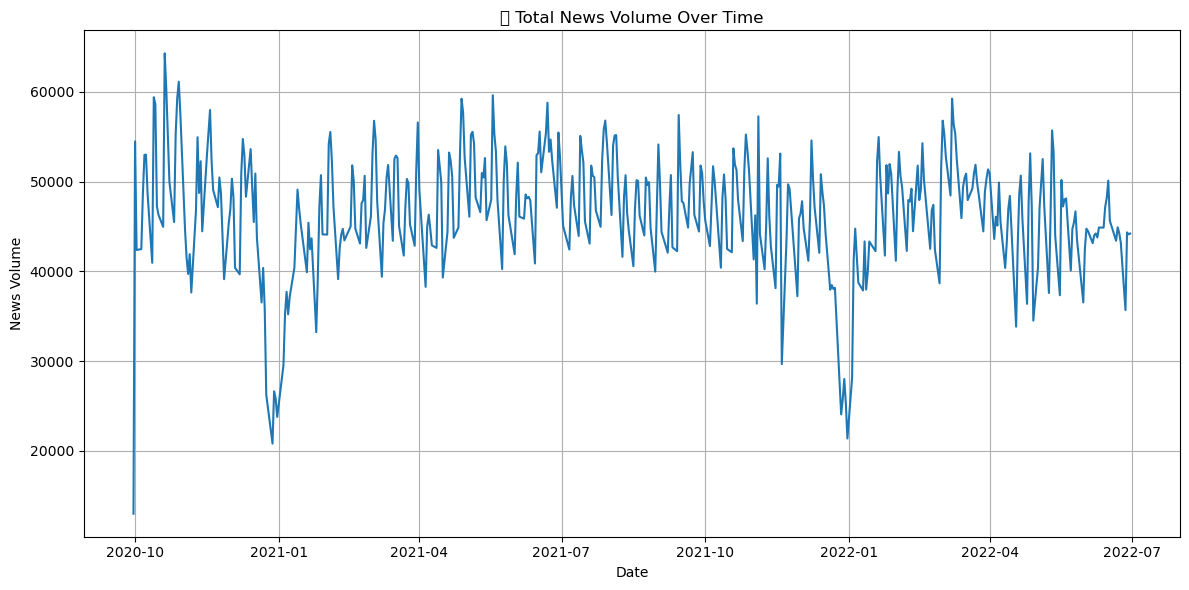

In [41]:
import matplotlib.pyplot as plt

# Convert Date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to aggregate volume
daily_volume = df.groupby('Date')['News - Volume'].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily_volume.index, daily_volume.values)
plt.title('📰 Total News Volume Over Time')
plt.xlabel('Date')
plt.ylabel('News Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\2724435345.py:12: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


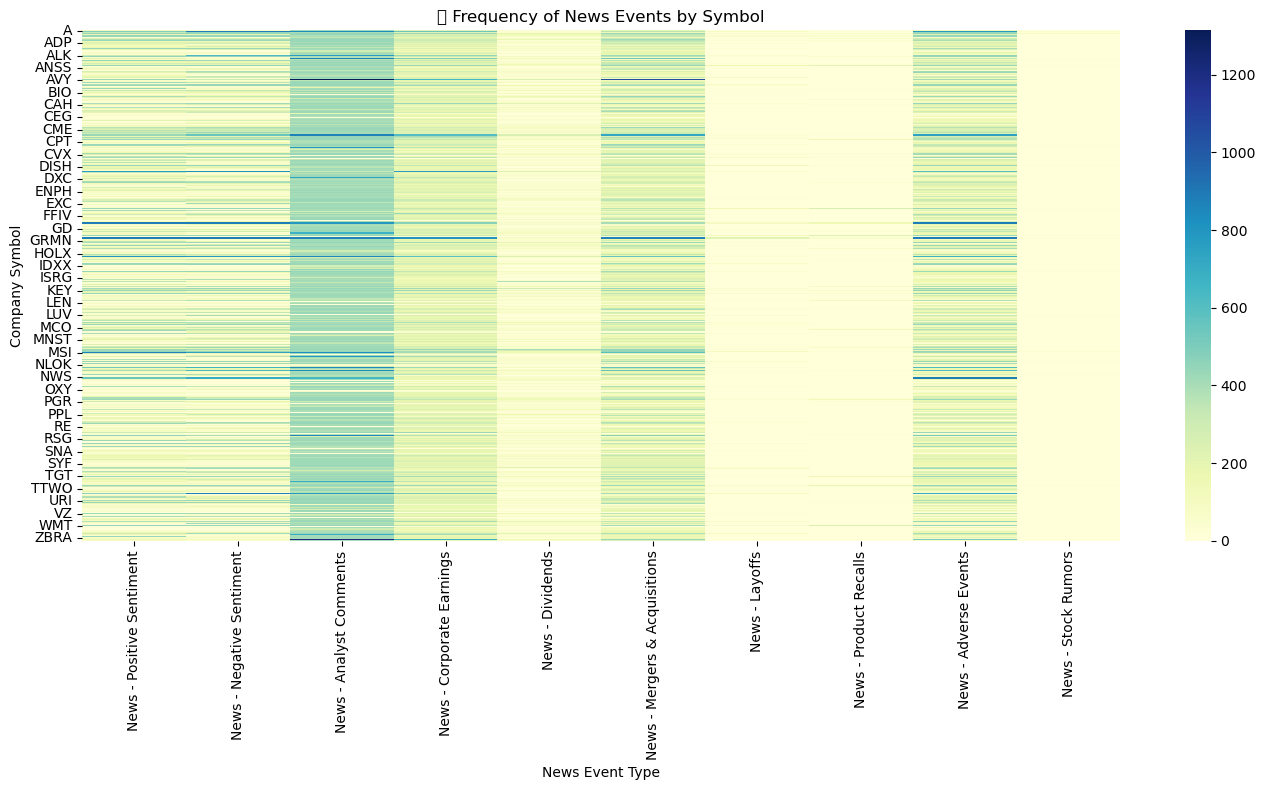

In [43]:
import seaborn as sns

# Count how many times each symbol had a non-zero event
symbol_event_counts = df.groupby('Symbol')[news_columns].apply(lambda x: (x > 0).sum())

# Plot as heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(symbol_event_counts, cmap='YlGnBu', annot=False, cbar=True)
plt.title("🔥 Frequency of News Events by Symbol")
plt.ylabel("Company Symbol")
plt.xlabel("News Event Type")
plt.tight_layout()
plt.show()


Total exact duplicates before dropping: 11907

Top Symbols with most duplicate rows:
Symbol
ZION    882
AVGO    882
HPQ     441
XRAY    441
UAL     441
TRMB    441
ROK     441
NWSA    441
NWS     441
NSC     441
dtype: int64


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3182538090.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_counts.index[:15], y=duplicate_counts.values[:15], palette='mako')


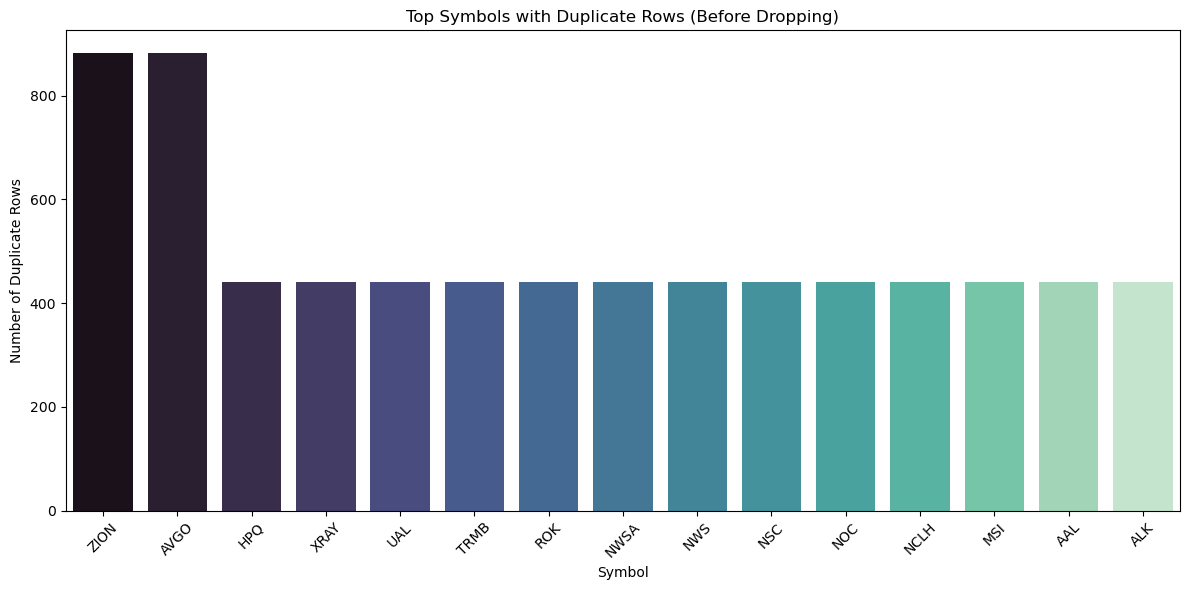


Shape after dropping duplicates: (228836, 23)
Exact duplicates remaining: 0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count duplicates before dropping
df['is_duplicate'] = df.duplicated()

# 2. Count how many duplicate rows existed for each Symbol
duplicate_counts = df[df['is_duplicate']].groupby('Symbol').size().sort_values(ascending=False)

# 3. Display total duplicates
print(f"Total exact duplicates before dropping: {df['is_duplicate'].sum()}")
print("\nTop Symbols with most duplicate rows:")
print(duplicate_counts.head(10))

# 4. Plot duplicates per symbol
plt.figure(figsize=(12, 6))
sns.barplot(x=duplicate_counts.index[:15], y=duplicate_counts.values[:15], palette='mako')
plt.title("Top Symbols with Duplicate Rows (Before Dropping)")
plt.xlabel("Symbol")
plt.ylabel("Number of Duplicate Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Drop the duplicate rows now
df.drop_duplicates(keep='first', inplace=True)

# 6. Final check
print(f"\nShape after dropping duplicates: {df.shape}")
print(f"Exact duplicates remaining: {df.duplicated().sum()}")

# 7. Drop the helper column
df.drop(columns=['is_duplicate'], inplace=True)


In [47]:
# Verify data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 228836 entries, 0 to 229717
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           228836 non-null  datetime64[ns]
 1   Open                           228836 non-null  float64       
 2   High                           228836 non-null  float64       
 3   Low                            228836 non-null  float64       
 4   Close                          228836 non-null  float64       
 5   Adj Close                      228836 non-null  float64       
 6   Volume                         228836 non-null  float64       
 7   Symbol                         228836 non-null  object        
 8   GICS Sector                    228836 non-null  object        
 9   GICS Sub-Industry              228836 non-null  object        
 10  News - All News Volume         228836 non-null  float64       
 11  News 

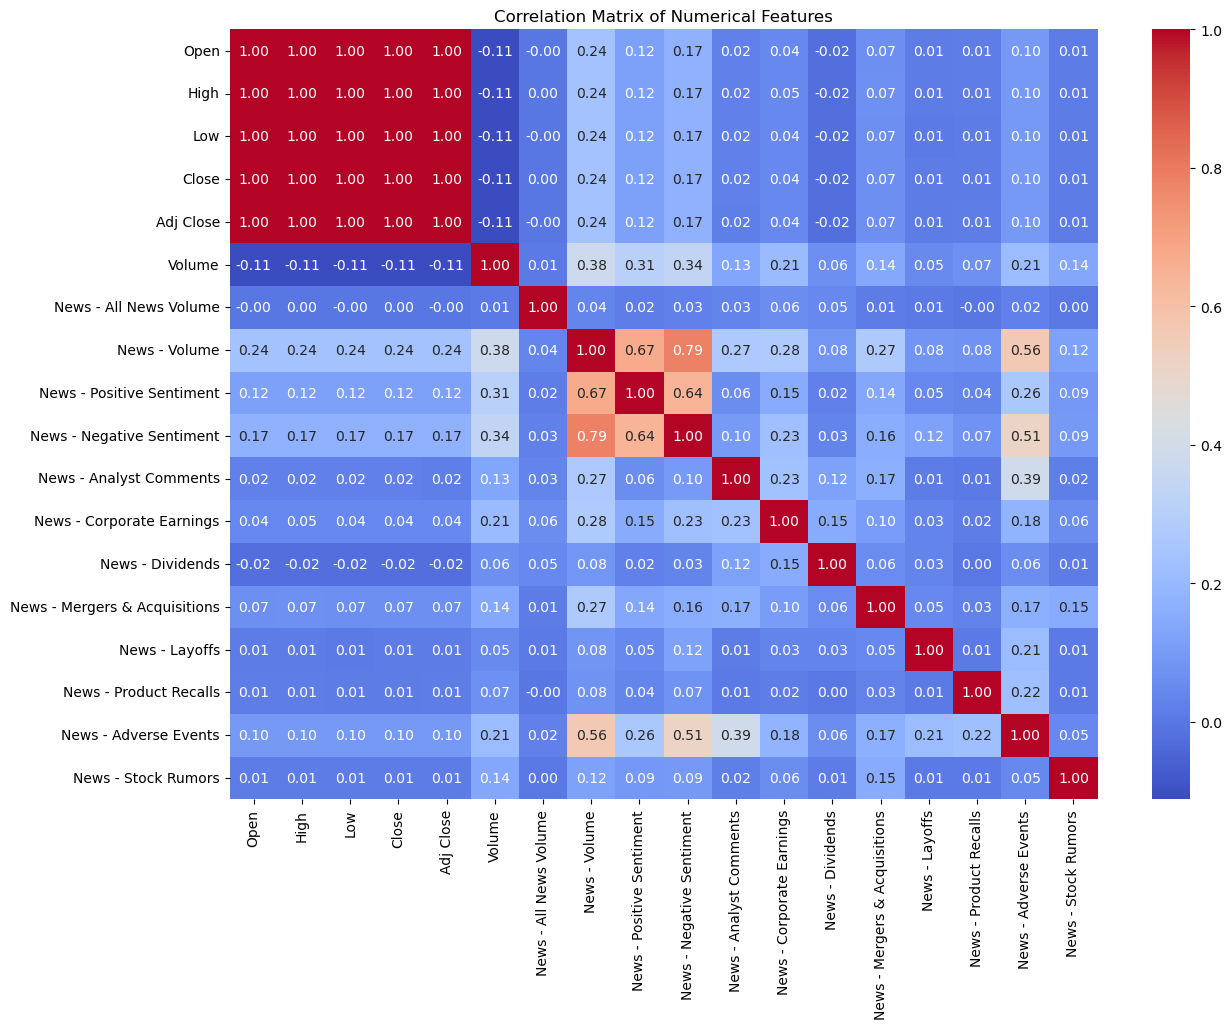

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for correlation
numerical_columns = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment',
    'News - Analyst Comments', 'News - Corporate Earnings',
    'News - Dividends', 'News - Mergers & Acquisitions',
    'News - Layoffs', 'News - Product Recalls',
    'News - Adverse Events', 'News - Stock Rumors'
]

# Calculate correlation matrix for numerical columns
corr = df[numerical_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\1486322246.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


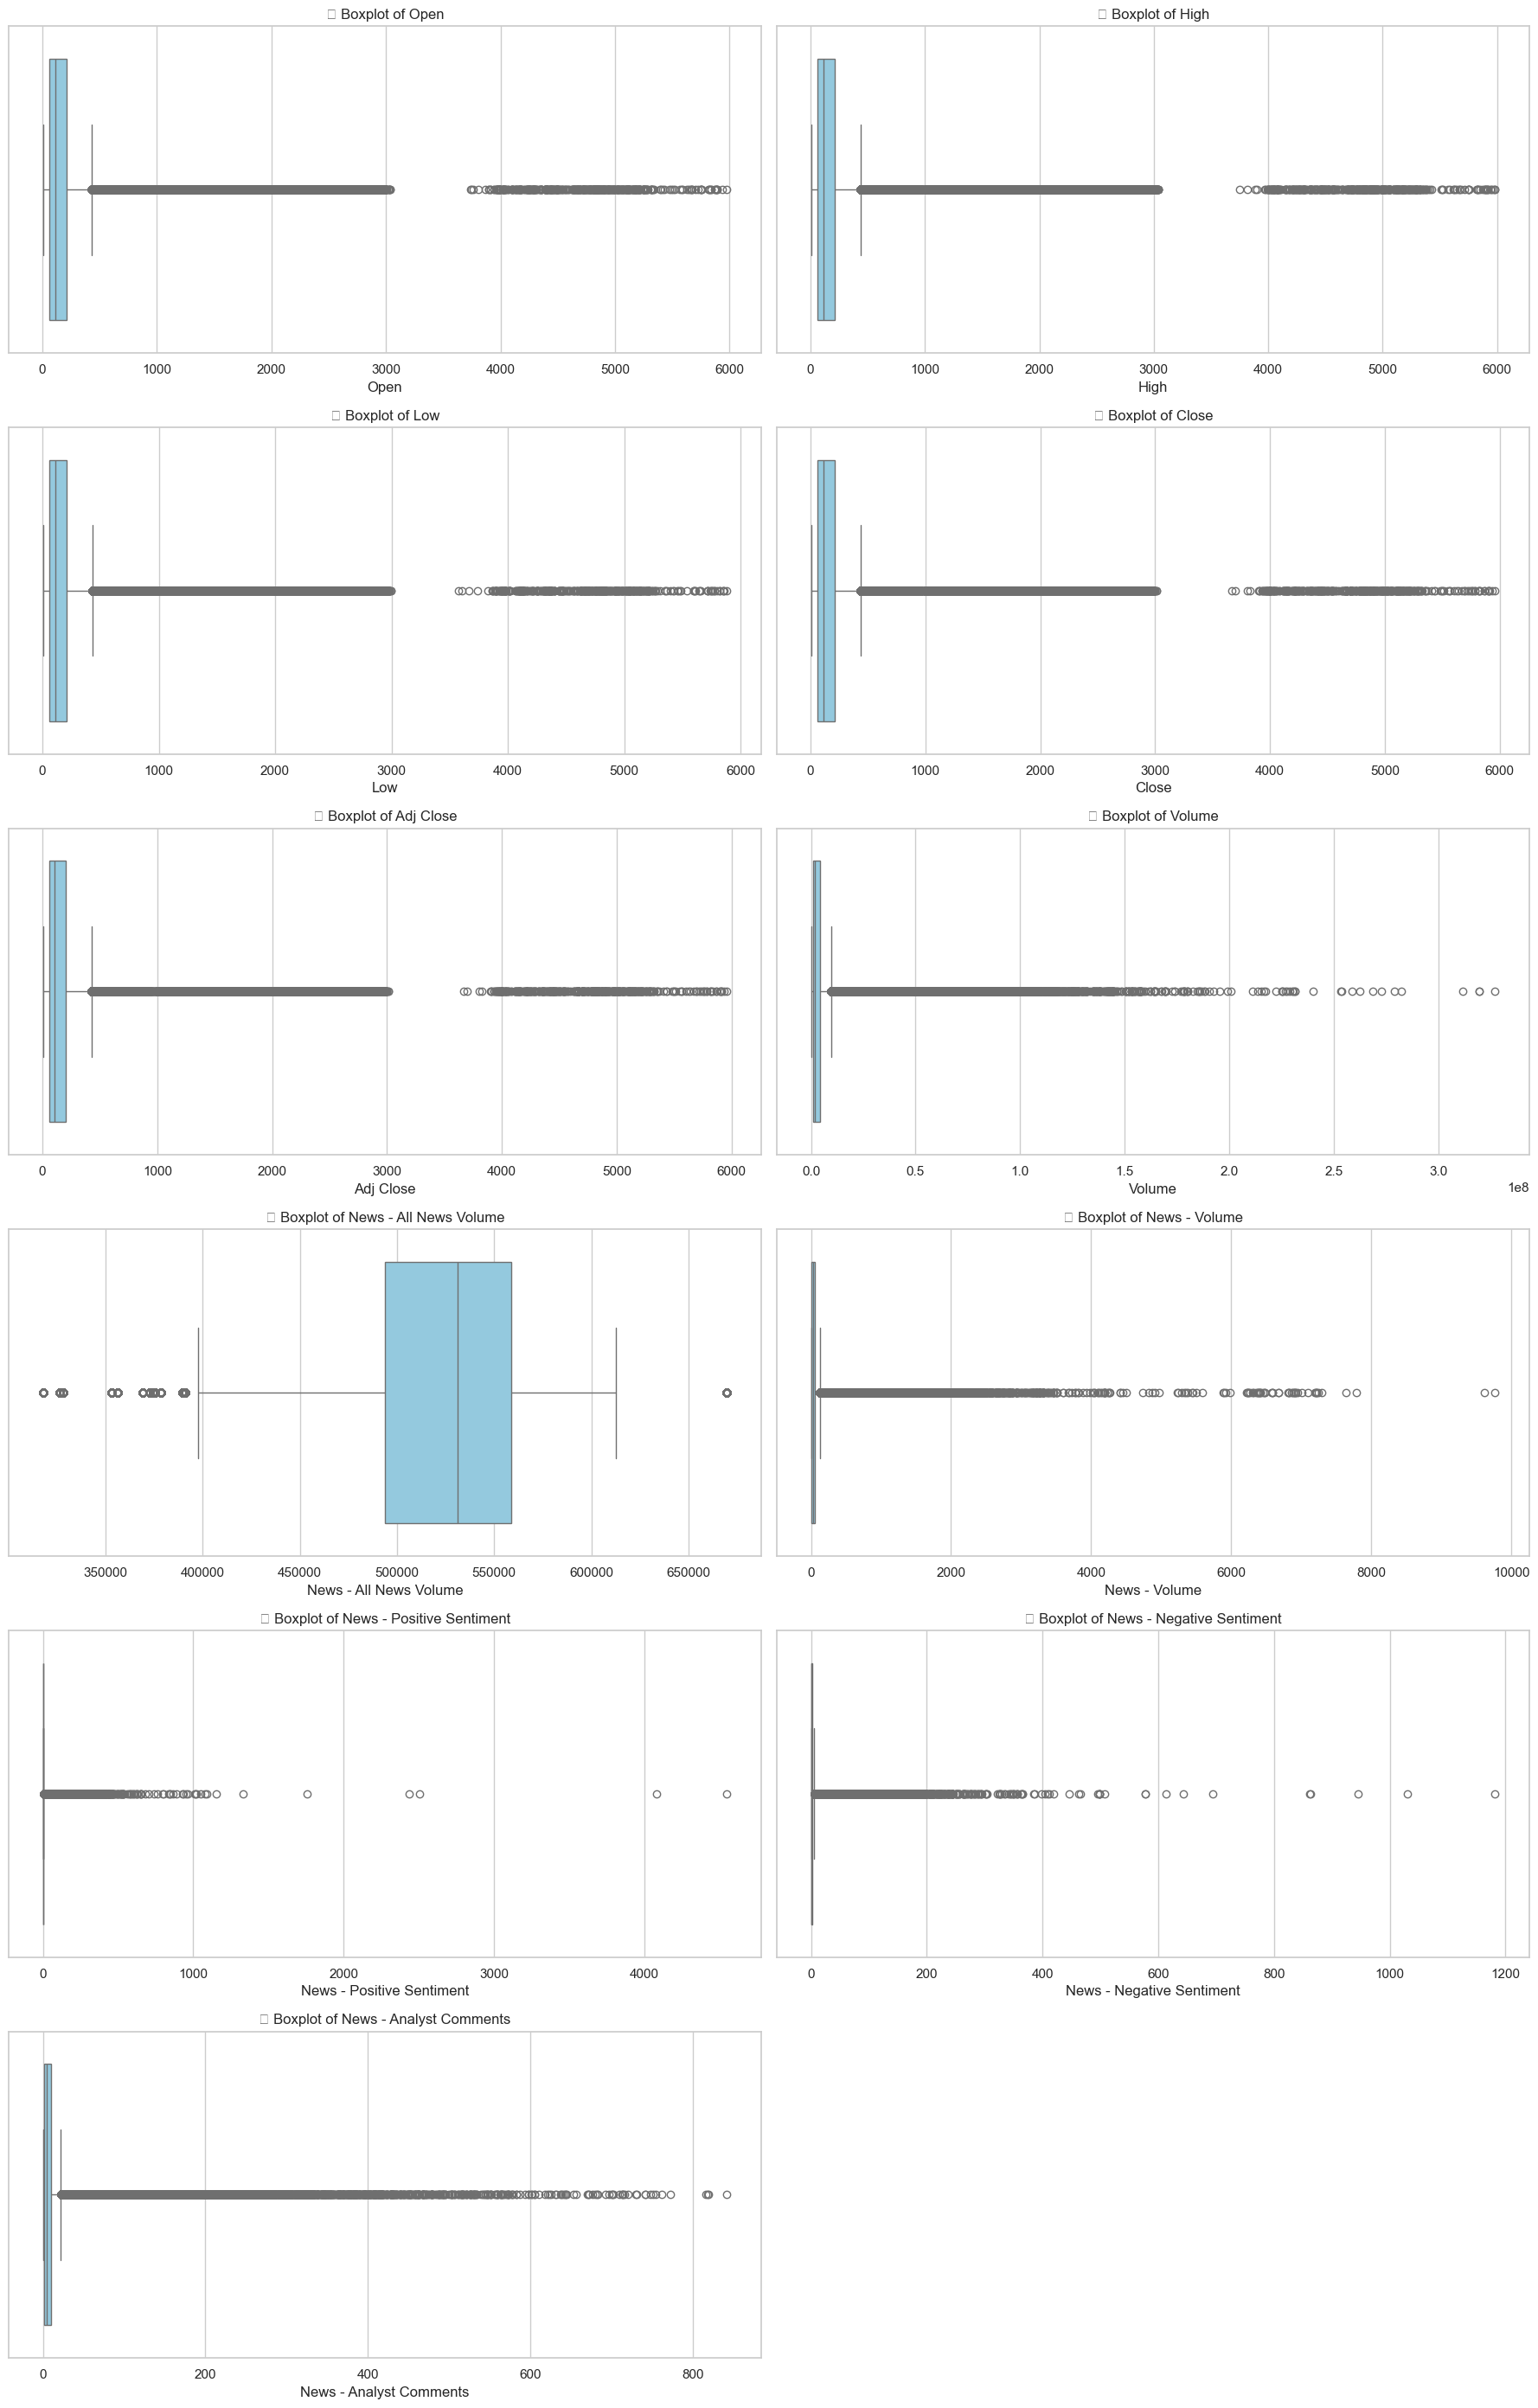

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check for outliers
columns_to_check_outliers = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment',
    'News - Analyst Comments'  
]

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 28))

# Create subplots for each variable
for idx, col in enumerate(columns_to_check_outliers):
    plt.subplot(6, 2, idx + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"📦 Boxplot of {col}", fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

# Initialise the scaler
scaler = MinMaxScaler()

# Apply MinMaxScaler
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [55]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Symbol', 'GICS Sector', 'GICS Sub-Industry']

# Dictionary to store each label encoder for later decoding
label_encoders = {}

# Apply label encoding to each categorical column and save the encoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for reverse lookup
    print(f"✅ Encoded {col}")

# Show column names
print("🧾 Updated column names:")
print(df.columns.tolist())

# Preview the first few rows
print("\n📌 Preview of encoded dataset:")
print(df.head())


✅ Encoded Symbol
✅ Encoded GICS Sector
✅ Encoded GICS Sub-Industry
🧾 Updated column names:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol', 'GICS Sector', 'GICS Sub-Industry', 'News - All News Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - Analyst Comments', 'News - Corporate Earnings', 'News - Dividends', 'News - Mergers & Acquisitions', 'News - Layoffs', 'News - Product Recalls', 'News - Adverse Events', 'News - Stock Rumors']

📌 Preview of encoded dataset:
        Date      Open      High       Low     Close  Adj Close    Volume  \
0 2020-09-30  0.026302  0.026614  0.026339  0.026250   0.024711  0.009344   
1 2020-10-01  0.026258  0.026413  0.026187  0.026016   0.024492  0.006079   
2 2020-10-02  0.025555  0.026420  0.025937  0.026280   0.024740  0.005405   
3 2020-10-05  0.026522  0.026681  0.026874  0.026681   0.025118  0.004453   
4 2020-10-06  0.026722  0.027049  0.026886  0.026594   0.025036  0.006180   

   

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure data is sorted by date and symbol
df = df.sort_values(by=['Symbol', 'Date'])

# --- 1. Generate lag features ---
df['Lag_Close_1'] = df.groupby('Symbol')['Close'].shift(1)
df['Lag_Close_3'] = df.groupby('Symbol')['Close'].shift(3)

# --- 2. 3-day moving average ---
df['MA_3_Close'] = df.groupby('Symbol')['Close'].rolling(window=3).mean().reset_index(level=0, drop=True)

# --- 3. Proxy sentiment score ---
df['Proxy_Sentiment'] = (
    df['News - Positive Sentiment'] +
    df['News - Analyst Comments'] +
    df['News - Corporate Earnings'] +
    df['News - Dividends'] +
    df['News - Mergers & Acquisitions']
) - (
    df['News - Negative Sentiment'] +
    df['News - Adverse Events'] +
    df['News - Product Recalls'] +
    df['News - Stock Rumors'] +
    df['News - Layoffs']
)

# --- 4. Normalize proxy sentiment using MinMaxScaler ---
scaler = MinMaxScaler()
df['Sentiment_Score_Scaled'] = scaler.fit_transform(df[['Proxy_Sentiment']])

# --- 5. Select key features (example subset) ---
selected_features = [
    # Temporal and Identification
    'Date', 'Symbol',
    
    # Price-based features
    'Open', 'High', 'Low', 'Close', 'Adj Close',
    'Lag_Close_1', 'Lag_Close_3', 'MA_3_Close',
    
    # Volume and trading activity
    'Volume',
    
    # Sentiment and event-based features
    'Sentiment_Score_Scaled',  # Proxy sentiment
    'News - Analyst Comments', 'News - Corporate Earnings',
    'News - Dividends', 'News - Mergers & Acquisitions',
    'News - Layoffs', 'News - Stock Rumors',
    'News - All News Volume', 'News - Volume',
    
    # Categorical context
    'GICS Sector', 'GICS Sub-Industry'
]


# Final dataset for model use
df_model = df[selected_features]

# Show result
print("✅ Feature engineering completed. Preview of df_model:")
print(df_model.head())


✅ Feature engineering completed. Preview of df_model:
           Date  Symbol      Open      High       Low     Close  Adj Close  \
5733 2020-09-30       0  0.016192  0.016375  0.016424  0.016303   0.016114   
5734 2020-10-01       0  0.016398  0.016462  0.016463  0.016350   0.016160   
5735 2020-10-02       0  0.016137  0.016273  0.016339  0.016146   0.015960   
5736 2020-10-05       0  0.016268  0.016638  0.016535  0.016669   0.016506   
5737 2020-10-06       0  0.016624  0.016616  0.016623  0.016418   0.016259   

      Lag_Close_1  Lag_Close_3  MA_3_Close  ...  News - Analyst Comments  \
5733          NaN          NaN         NaN  ...                 0.005938   
5734     0.016303          NaN         NaN  ...                 0.001188   
5735     0.016350          NaN    0.016266  ...                 0.003563   
5736     0.016146     0.016303    0.016388  ...                 0.002375   
5737     0.016669     0.016350    0.016411  ...                 0.000000   

      News - Corpora

In [59]:
# --- 1. Create Binary Target (Up/Down movement of Close price) ---
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# --- 2. Prepare the model dataset (drop NaNs from lag features) ---
df_model = df[selected_features + ['Target']].dropna()

# --- 3. Train-test split (80/20, chronological) ---
train_size = int(len(df_model) * 0.8)
train_df = df_model[:train_size]
test_df = df_model[train_size:]

X_train = train_df.drop(columns=['Target', 'Date'])  # Drop Date for model input
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target', 'Date'])
y_test = test_df['Target']

# --- 4. Train XGBoost Classifier ---
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# --- 5. Hyperparameter tuning with GridSearchCV ---
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model after tuning
best_xgb_model = grid_search.best_estimator_
print("✅ Best Hyperparameters:", grid_search.best_params_)

# --- 6. Evaluate Performance ---
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_xgb_model.predict(X_test)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [04:36:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [04:36:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [04:36:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [04:36:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [04:36:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

✅ Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
📊 Confusion Matrix:
 [[13660  9412]
 [ 8361 14038]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61     23072
           1       0.60      0.63      0.61     22399

    accuracy                           0.61     45471
   macro avg       0.61      0.61      0.61     45471
weighted avg       0.61      0.61      0.61     45471



✅ Accuracy: 60.91%
🎯 Precision: 0.60
🔁 Recall: 0.63
🏅 F1 Score: 0.61
🚀 AUC-ROC: 0.66


C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:32: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


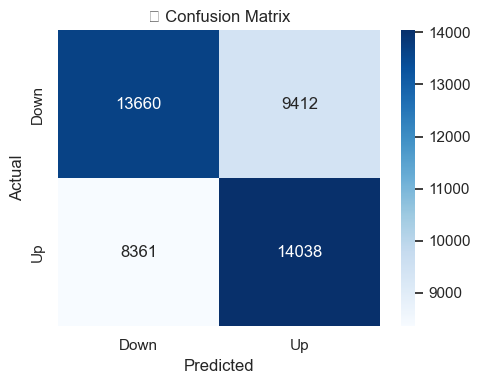

C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:45: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


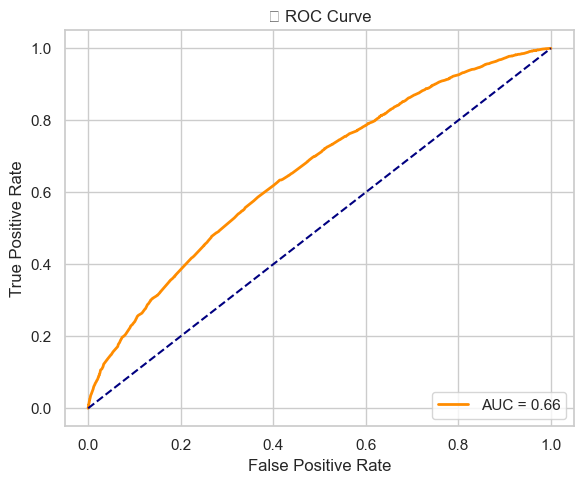

C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:45:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:45:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:45:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

📊 K-Fold CV Accuracy: 61.10% (± 0.34%)


C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=cv_scores * 100, palette="crest")
C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


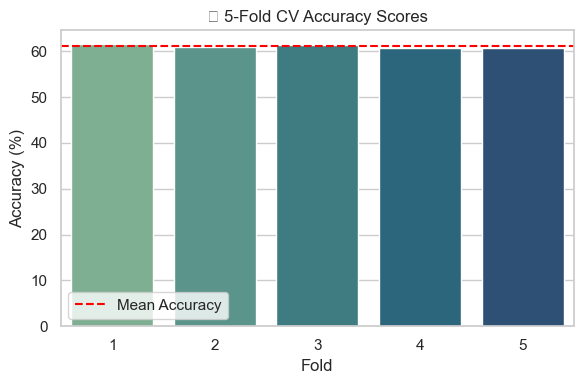

C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis")
C:\Users\mahir\AppData\Local\Temp\ipykernel_2864\656734227.py:75: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


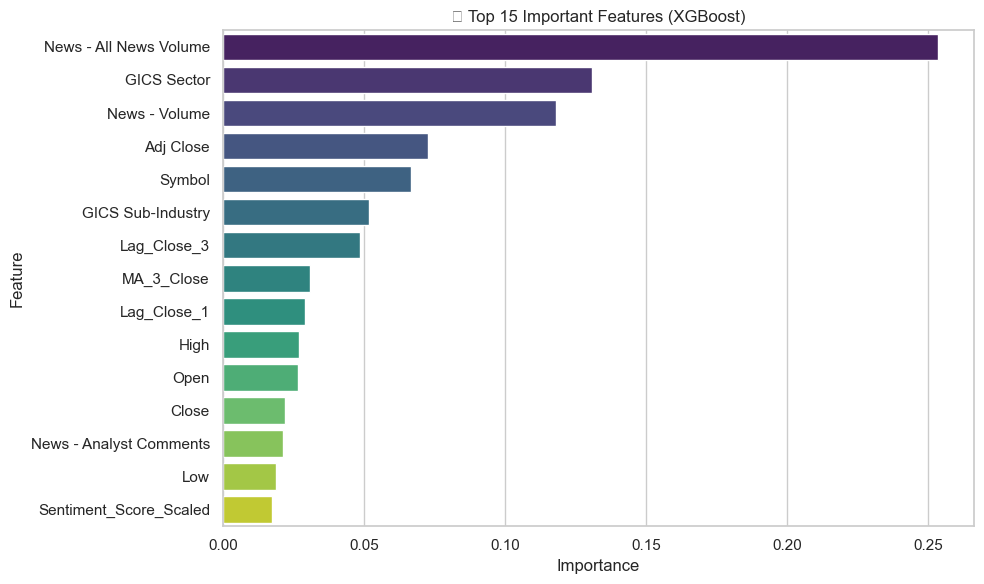

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd

# --- 1. Evaluate using classification metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision:.2f}")
print(f"🔁 Recall: {recall:.2f}")
print(f"🏅 F1 Score: {f1:.2f}")
print(f"🚀 AUC-ROC: {roc_auc:.2f}")

# --- 2. Plot Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("🧮 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 3. Plot AUC-ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🚀 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. K-Fold Cross-Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"📊 K-Fold CV Accuracy: {np.mean(cv_scores) * 100:.2f}% (± {np.std(cv_scores) * 100:.2f}%)")

# Plot K-Fold Scores
plt.figure(figsize=(6, 4))
sns.barplot(x=list(range(1, 6)), y=cv_scores * 100, palette="crest")
plt.axhline(np.mean(cv_scores) * 100, color='red', linestyle='--', label='Mean Accuracy')
plt.title("📊 5-Fold CV Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 5. Feature Importance Plot ---
importances = best_xgb_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis")
plt.title("🔥 Top 15 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


In [61]:
!pip install tpot


Defaulting to user installation because normal site-packages is not writeable


In [267]:
from tpot import TPOTClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. Custom config dict to only allow XGBClassifier ---
xgb_config = {
    'xgboost.XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5],
        'n_jobs': [1]  # TPOT doesn't like -1 sometimes
    }
}

# --- 2. Drop Date and prepare X and y ---
df_model = df[selected_features + ['Target']].dropna()
X = df_model.drop(columns=['Target', 'Date'])
y = df_model['Target']

# --- 3. Chronological Train-Test Split ---
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- 4. Run TPOT with XGBoost ---
tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='accuracy',
    config_dict=xgb_config,
    random_state=42,
    disable_update_check=True
)

tpot.fit(X_train, y_train)

# --- 5. Evaluate Performance ---
print("✅ TPOT Accuracy on Test Set:", tpot.score(X_test, y_test))

# --- 6. Export Final Optimized Pipeline ---
tpot.export("best_xgb_pipeline.py")
print("📦 Best pipeline saved as 'best_xgb_pipeline.py'")


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5915878601275566

Generation 2 - Current best internal CV score: 0.5915878601275566

Generation 3 - Current best internal CV score: 0.594952716076534

Generation 4 - Current best internal CV score: 0.594952716076534

Generation 5 - Current best internal CV score: 0.594952716076534

Generation 6 - Current best internal CV score: 0.5950351880360678

Generation 7 - Current best internal CV score: 0.5950351880360678

Generation 8 - Current best internal CV score: 0.6043215306795691

Generation 9 - Current best internal CV score: 0.6043215306795691

Generation 10 - Current best internal CV score: 0.6043215306795691

Best pipeline: XGBClassifier(XGBClassifier(input_matrix, learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.8), learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.8)
✅ TPOT Accuracy on Test Set: 0.6475995689560379
📦 Best pipeline saved as 'best_xg

✅ Accuracy: 57.83%
🎯 Precision: 0.57
🔁 Recall: 0.55
🏅 F1 Score: 0.56
🚀 AUC-ROC: 0.61


C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:52: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


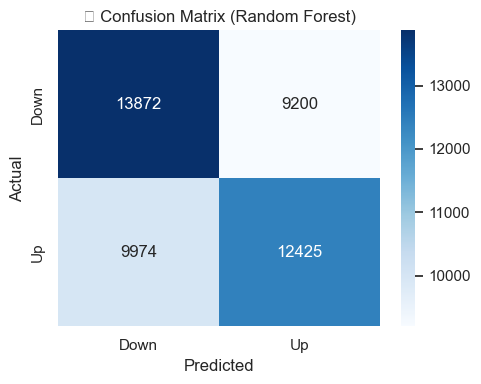

C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:65: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


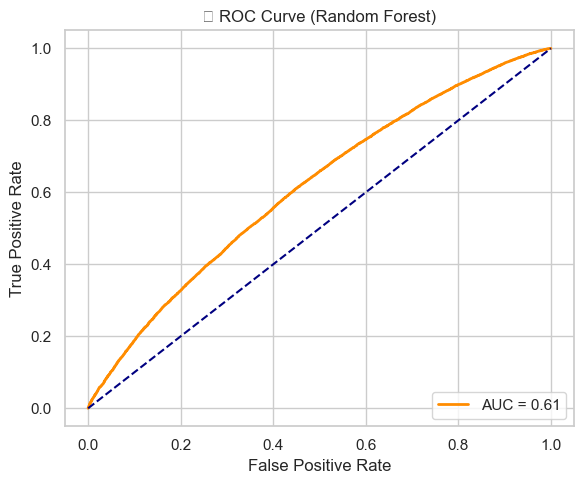

📊 K-Fold CV Accuracy: 57.16% (± 0.14%)


C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=cv_scores * 100, palette="crest")
C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:81: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


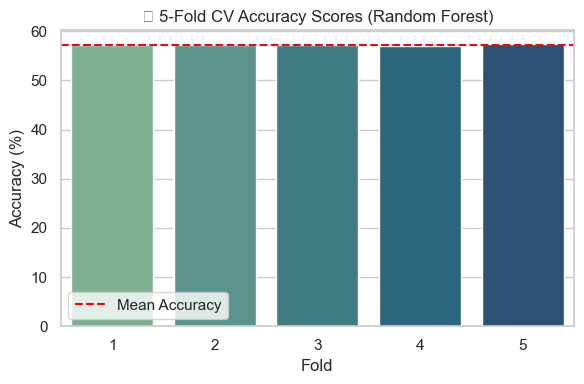

C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis")
C:\Users\mahir\AppData\Local\Temp\ipykernel_14872\1079919959.py:94: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


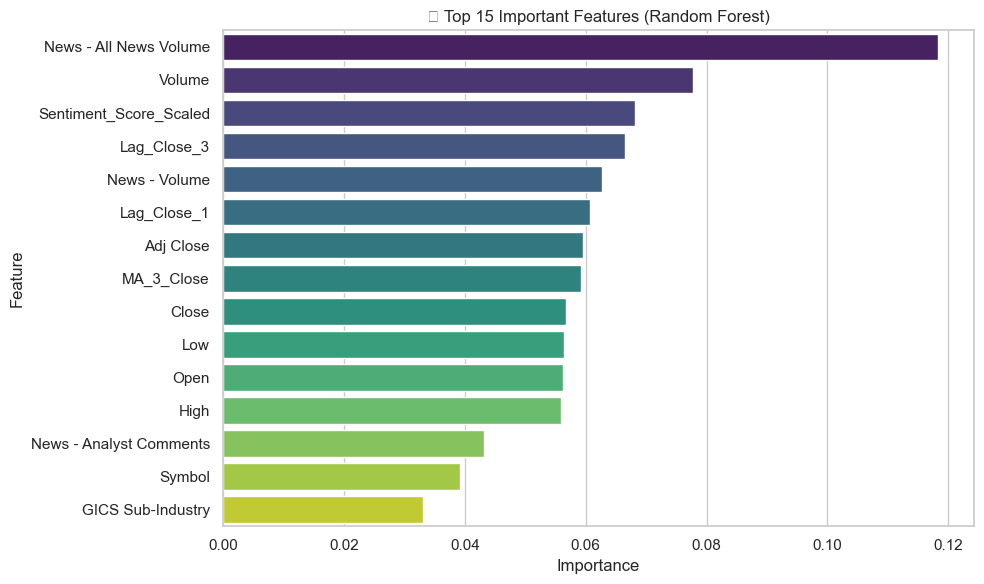

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# --- 1. GridSearchCV for Random Forest ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# --- 2. Predictions ---
y_pred = best_rf.predict(X_test)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# --- 3. Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision:.2f}")
print(f"🔁 Recall: {recall:.2f}")
print(f"🏅 F1 Score: {f1:.2f}")
print(f"🚀 AUC-ROC: {roc_auc:.2f}")

# --- 4. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("🧮 Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 5. ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🚀 ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 6. K-Fold Cross-Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"📊 K-Fold CV Accuracy: {np.mean(cv_scores) * 100:.2f}% (± {np.std(cv_scores) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.barplot(x=list(range(1, 6)), y=cv_scores * 100, palette="crest")
plt.axhline(np.mean(cv_scores) * 100, color='red', linestyle='--', label='Mean Accuracy')
plt.title("📊 5-Fold CV Accuracy Scores (Random Forest)")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 7. Feature Importance ---
importances = best_rf.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis")
plt.title("🔥 Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [63]:
!pip install deap --quiet

import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set seed
random.seed(42)
np.random.seed(42)

# --- 1. Genetic Algorithm Setup ---
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # maximize accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)

# --- 2. Define bounds ---
n_estimators_bounds = (50, 300)
max_depth_bounds = (3, 30)
min_samples_split_bounds = (2, 10)
min_samples_leaf_bounds = (1, 5)

toolbox = base.Toolbox()

# Register attribute generators
toolbox.register("n_estimators", random.randint, *n_estimators_bounds)
toolbox.register("max_depth", random.randint, *max_depth_bounds)
toolbox.register("min_samples_split", random.randint, *min_samples_split_bounds)
toolbox.register("min_samples_leaf", random.randint, *min_samples_leaf_bounds)

# Structure initializers
toolbox.register(
    "individual",
    tools.initCycle,
    creator.Individual,
    (toolbox.n_estimators, toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf),
    n=1
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# --- 3. Evaluation Function ---
def evaluate(individual):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = individual
    try:
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42,
            n_jobs=-1
        )
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
        return (np.mean(scores),)
    except:
        return (0.0,)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=[50, 3, 2, 1], up=[300, 30, 10, 5], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- 4. GA Parameters ---
population = toolbox.population(n=20)
generations = 10
cxpb = 0.7  # Crossover probability
mutpb = 0.2  # Mutation probability

# --- 5. Run the GA ---
best_individuals = []

for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    fits = toolbox.map(toolbox.evaluate, offspring)

    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))
    top = tools.selBest(population, k=1)[0]
    best_individuals.append(top)
    print(f"Gen {gen+1}: Best Accuracy = {top.fitness.values[0]:.4f}, Params = {top}")

# --- 6. Final Best Result ---
best_solution = tools.selBest(population, k=1)[0]
print("\n✅ Best Hyperparameters Found:")
print(f"n_estimators: {best_solution[0]}")
print(f"max_depth: {best_solution[1]}")
print(f"min_samples_split: {best_solution[2]}")
print(f"min_samples_leaf: {best_solution[3]}")
print(f"Best CV Accuracy: {best_solution.fitness.values[0]:.4f}")


Gen 1: Best Accuracy = 0.5516, Params = [299, 29, 3, 5]
Gen 2: Best Accuracy = 0.5520, Params = [218, 29, 4, 5]
Gen 3: Best Accuracy = 0.5523, Params = [233, 29, 10, 5]
Gen 4: Best Accuracy = 0.5526, Params = [233, 29, 10, 4]
Gen 5: Best Accuracy = 0.5534, Params = [233, 28, 10, 4]
Gen 6: Best Accuracy = 0.5541, Params = [203, 28, 10, 4]
Gen 7: Best Accuracy = 0.5541, Params = [203, 28, 10, 4]
Gen 8: Best Accuracy = 0.5541, Params = [203, 28, 10, 4]
Gen 9: Best Accuracy = 0.5541, Params = [203, 28, 10, 4]
Gen 10: Best Accuracy = 0.5541, Params = [203, 28, 10, 4]

✅ Best Hyperparameters Found:
n_estimators: 203
max_depth: 28
min_samples_split: 10
min_samples_leaf: 4
Best CV Accuracy: 0.5541


In [61]:
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# --- 1. Filter for one stock symbol ---
stock_df = df[df['Symbol'] == df['Symbol'].unique()[0]].copy()
stock_df = stock_df.sort_values('Date')

# --- 2. Select feature and scale ---
close_prices = stock_df[
'Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

# --- 3. Create sequences for LSTM (e.g., 60 time steps) ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


window_size = 60
X, y = create_sequences(scaled_close, window_size)

# Reshape for LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 4. Train/Test Split ---
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- 5. Build LSTM Model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# --- 6. Train the Model ---
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

# --- 7. Predict and Inverse Transform ---
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- 8. Evaluate Accuracy (RMSE and Accuracy %) ---
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
accuracy_percentage = 100 - (rmse / np.mean(y_test_inverse) * 100)

print(f"✅ RMSE: {rmse:.2f}")
print(f"📈 Accuracy (approx): {accuracy_percentage:.2f}%")

# --- 9. Save the model ---
model.save("lstm_stock_model.h5")
print("💾 LSTM model saved as 'lstm_stock_model.h5'")


Defaulting to user installation because normal site-packages is not writeable
Epoch 1/200


C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1890
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0076
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0055
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0049
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0045
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0043
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040
Epoch 13/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039
Epoch 14/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037
Epoch 15/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034
E

✅ RMSE: 0.00
📈 Accuracy (approx): 96.75%
💾 LSTM model saved as 'lstm_stock_model.h5'


📉 MAE (Mean Absolute Error): 0.00
📏 RMSE (Root Mean Squared Error): 0.00
📈 R² Score: 0.71
✅ Approximate Accuracy: 96.75%


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\1498194718.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


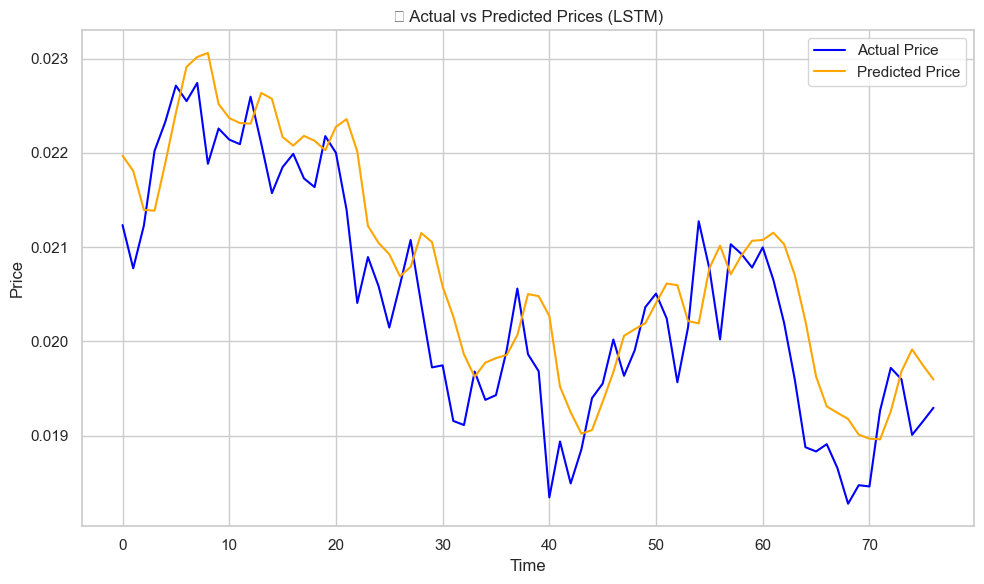

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Compute Forecasting Metrics ---
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f"📉 MAE (Mean Absolute Error): {mae:.2f}")
print(f"📏 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")
print(f"✅ Approximate Accuracy: {accuracy_percentage:.2f}%")

# --- 2. Plot Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Actual Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Price', color='orange')
plt.title('📊 Actual vs Predicted Prices (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
# --- 1. Predicted Trend Direction ---
predicted_direction = "up" if y_pred_inverse[-1] > y_test_inverse[-1] else "down"

# --- 2. Latest Sentiment Score (Scaled) ---
latest_sentiment = stock_df['Sentiment_Score_Scaled'].iloc[-1]

# --- 3. Volume Strength ---
latest_volume = stock_df['Volume'].iloc[-1]
average_volume = stock_df['Volume'].tail(60).mean()
volume_strength = "high" if latest_volume > average_volume else "low"

# --- 4. Sector & Sub-Industry (decode from label encoded)
encoded_symbol = stock_df['Symbol'].iloc[-1]
encoded_sector = stock_df['GICS Sector'].iloc[-1]
encoded_sub_industry = stock_df['GICS Sub-Industry'].iloc[-1]

# Decode to original labels using stored encoders
symbol = label_encoders['Symbol'].inverse_transform([encoded_symbol])[0]
sector = label_encoders['GICS Sector'].inverse_transform([encoded_sector])[0]
sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform([encoded_sub_industry])[0]

# --- 5. Actual vs Predicted Price ---
actual_price = float(y_test_inverse[-1])
predicted_price = float(y_pred_inverse[-1])

# --- 6. Summary Dictionary for LLM ---
lstm_summary_for_llm = {
    "model": "LSTM",
    "symbol": symbol,
    "sector": sector,
    "sub_industry": sub_industry,
    "actual_price": round(actual_price, 2),
    "predicted_price": round(predicted_price, 2),
    "trend_direction": predicted_direction,
    "sentiment_score": round(latest_sentiment, 2),
    "volume_strength": volume_strength,
    "model_accuracy": f"{accuracy_percentage:.2f}%",
    "rmse": round(rmse, 2)
}

# --- 7. Print Summary ---
print("📊 Summary for LLM Advice:")
for key, value in lstm_summary_for_llm.items():
    print(f"{key}: {value}")


📊 Summary for LLM Advice:
model: LSTM
symbol: A
sector: Health Care
sub_industry: Health Care Equipment
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
sentiment_score: 0.6
volume_strength: low
model_accuracy: 96.75%
rmse: 0.0


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3545932747.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3545932747.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])


In [67]:
# Check encoded unique values
encoded_symbols = df['Symbol'].unique()

# Decode to original symbol names
original_symbols = label_encoders['Symbol'].inverse_transform(encoded_symbols)

# Display the unique original symbol names
print("✅ Unique original stock symbols in the dataset:")
print(original_symbols)


✅ Unique original stock symbols in the dataset:
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABMD' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM'
 'ADP' 'ADSK' 'AEE' 'AEP' 'AES' 'AFL' 'AIG' 'AIZ' 'AJG' 'AKAM' 'ALB'
 'ALGN' 'ALK' 'ALL' 'ALLE' 'AMAT' 'AMCR' 'AMD' 'AME' 'AMGN' 'AMP' 'AMT'
 'AMZN' 'ANET' 'ANSS' 'AON' 'AOS' 'APA' 'APD' 'APH' 'APTV' 'ARE' 'ATO'
 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AZO' 'BA' 'BAC' 'BAX' 'BBWI' 'BBY'
 'BDX' 'BEN' 'BIIB' 'BIO' 'BK' 'BKNG' 'BKR' 'BLK' 'BMY' 'BR' 'BSX' 'BWA'
 'BXP' 'C' 'CAG' 'CAH' 'CARR' 'CAT' 'CB' 'CBOE' 'CBRE' 'CCI' 'CCL' 'CDAY'
 'CDNS' 'CDW' 'CE' 'CEG' 'CF' 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL'
 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'COP'
 'COST' 'CPB' 'CPRT' 'CPT' 'CRL' 'CRM' 'CSCO' 'CSX' 'CTAS' 'CTLT' 'CTRA'
 'CTSH' 'CTVA' 'CTXS' 'CVS' 'CVX' 'CZR' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DG'
 'DGX' 'DHI' 'DHR' 'DIS' 'DISH' 'DLR' 'DLTR' 'DOV' 'DOW' 'DPZ' 'DRE' 'DRI'
 'DTE' 'DUK' 'DVA' 'DVN' 'DXC' 'DXCM' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX'
 'E

In [69]:
from collections import defaultdict

sector_summaries = []

# Get unique encoded sector values
unique_encoded_sectors = df['GICS Sector'].unique()

for encoded_sector in unique_encoded_sectors:
    # Decode sector name
    sector_name = label_encoders['GICS Sector'].inverse_transform([encoded_sector])[0]
    
    # Filter one symbol from this sector
    sector_df = df[df['GICS Sector'] == encoded_sector]
    encoded_symbol = sector_df['Symbol'].unique()[0]  # Take the first symbol for that sector
    stock_df = df[df['Symbol'] == encoded_symbol].copy().sort_values('Date')
    
    # Prepare LSTM data
    close_prices = stock_df['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_close = scaler.fit_transform(close_prices)

    def create_sequences(data, window_size):
        X, y = [], []
        for i in range(window_size, len(data)):
            X.append(data[i - window_size:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    window_size = 60
    X, y = create_sequences(scaled_close, window_size)
    if len(X) == 0:
        continue  # Skip if not enough data

    X = X.reshape((X.shape[0], X.shape[1], 1))
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build and train LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    accuracy_percentage = 100 - (rmse / np.mean(y_test_inverse) * 100)

    # Other details
    predicted_direction = "up" if y_pred_inverse[-1] > y_test_inverse[-1] else "down"
    latest_sentiment = stock_df['Sentiment_Score_Scaled'].iloc[-1]
    latest_volume = stock_df['Volume'].iloc[-1]
    avg_volume = stock_df['Volume'].tail(60).mean()
    volume_strength = "high" if latest_volume > avg_volume else "low"

    # Decode all labels
    symbol = label_encoders['Symbol'].inverse_transform([encoded_symbol])[0]
    sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform(
        [stock_df['GICS Sub-Industry'].iloc[-1]]
    )[0]

    actual_price = float(y_test_inverse[-1])
    predicted_price = float(y_pred_inverse[-1])

    summary = {
        "model": "LSTM",
        "symbol": symbol,
        "sector": sector_name,
        "sub_industry": sub_industry,
        "actual_price": round(actual_price, 2),
        "predicted_price": round(predicted_price, 2),
        "trend_direction": predicted_direction,
        "sentiment_score": round(latest_sentiment, 2),
        "volume_strength": volume_strength,
        "model_accuracy": f"{accuracy_percentage:.2f}%",
        "rmse": round(rmse, 2)
    }

    sector_summaries.append(summary)

# --- Print All Summaries ---
for summary in sector_summaries:
    print("\n📊 Summary for LLM Advice:")
    for key, value in summary.items():
        print(f"{key}: {value}")


C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026DC3043B00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step

📊 Summary for LLM Advice:
model: LSTM
symbol: A
sector: Health Care
sub_industry: Health Care Equipment
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
sentiment_score: 0.6
volume_strength: low
model_accuracy: 93.28%
rmse: 0.0

📊 Summary for LLM Advice:
model: LSTM
symbol: AAL
sector: Industrials
sub_industry: Airlines
actual_price: 0.0
predicted_price: 0.0
trend_direction: up
sentiment_score: 0.59
volume_strength: high
model_accuracy: 89.44%
rmse: 0.0

📊 Summary for LLM Advice:
model: LSTM
symbol: AAP
sector: Consumer Discretionary
sub_industry: Automotive Retail
actual_price: 0.03
predicted_price: 0.03
trend_direction: up
sentiment_score: 0.59
volume_strength: high
model_accuracy: 93.83%
rmse: 0.0

📊 Summary for LLM Advice:
model: LSTM
symbol: AAPL
sector: Information Technology
sub_industry: Technology Hardware, Storage & Peripherals
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
sentiment_score: 0.58
volume_strength

C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(y_test_inverse[-1])
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\4062951306.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(y_pred_inverse[-1])


In [71]:
from collections import defaultdict

enhanced_summaries = []
sector_symbol_count = defaultdict(int)

for symbol_enc in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol_enc].copy().sort_values('Date')
    
    if len(stock_df) < 100:
        continue

    # Extract encoded sector
    encoded_sector = stock_df['GICS Sector'].iloc[-1]

    # Skip if already have 2 symbols from this sector
    if sector_symbol_count[encoded_sector] >= 2:
        continue

    # Proceed with modeling...
    close_prices = stock_df['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_close = scaler.fit_transform(close_prices)

    def create_sequences(data, window_size=60):
        X, y = [], []
        for i in range(window_size, len(data)):
            X.append(data[i - window_size:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    X, y = create_sequences(scaled_close)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    accuracy_percentage = 100 - (rmse / np.mean(y_test_inverse) * 100)
    confidence_level = "high" if rmse < 3 else "medium" if rmse < 6 else "low"
    predicted_direction = "up" if y_pred_inverse[-1] > y_test_inverse[-1] else "down"

    encoded_sub_industry = stock_df['GICS Sub-Industry'].iloc[-1]
    symbol = label_encoders['Symbol'].inverse_transform([symbol_enc])[0]
    sector = label_encoders['GICS Sector'].inverse_transform([encoded_sector])[0]
    sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform([encoded_sub_industry])[0]

    sentiment_last_30 = stock_df['Sentiment_Score_Scaled'].tail(30)
    latest_sentiment = sentiment_last_30.iloc[-1]
    avg_sentiment_30 = sentiment_last_30.mean()
    sentiment_trend = "increasing" if sentiment_last_30.iloc[-1] > sentiment_last_30.iloc[0] else "decreasing"

    latest_volume = stock_df['Volume'].iloc[-1]
    avg_volume_60 = stock_df['Volume'].tail(60).mean()
    volume_strength = "high" if latest_volume > avg_volume_60 else "low"

    last_30 = stock_df['Close'].tail(30)
    trend_pct_change = ((last_30.iloc[-1] - last_30.iloc[0]) / last_30.iloc[0]) * 100
    volatility_30 = last_30.pct_change().std()

    alerts = []
    if volatility_30 > 0.03:
        alerts.append("⚠️ High volatility")
    if latest_sentiment > 0.7 and predicted_direction == "down":
        alerts.append("🤔 Sentiment up, but trend down")
    if volume_strength == "high" and predicted_direction == "down":
        alerts.append("🧐 Unusual volume against price drop")

    summary = {
        "model": "LSTM",
        "symbol": symbol,
        "sector": sector,
        "sub_industry": sub_industry,
        "actual_price": round(float(y_test_inverse[-1]), 2),
        "predicted_price": round(float(y_pred_inverse[-1]), 2),
        "trend_direction": predicted_direction,
        "trend_30day_change_pct": round(trend_pct_change, 2),
        "volatility_30d": round(volatility_30, 4),
        "sentiment_score": round(latest_sentiment, 2),
        "avg_sentiment_30d": round(avg_sentiment_30, 2),
        "sentiment_trend": sentiment_trend,
        "volume_strength": volume_strength,
        "model_accuracy": f"{accuracy_percentage:.2f}%",
        "confidence_level": confidence_level,
        "rmse": round(rmse, 2),
        "alerts": alerts
    }

    print(f"\n📊 Enhanced Summary for {symbol}:")
    for k, v in summary.items():
        print(f"{k}: {v}")

    enhanced_summaries.append(summary)
    sector_symbol_count[encoded_sector] += 1

    # Stop early if 22 summaries generated
    if len(enhanced_summaries) >= 22:
        break


C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step

📊 Enhanced Summary for A:
model: LSTM
symbol: A
sector: Health Care
sub_industry: Health Care Equipment
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
trend_30day_change_pct: -1.73
volatility_30d: 0.0253
sentiment_score: 0.6
avg_sentiment_30d: 0.6
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 95.20%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step

📊 Enhanced Summary for AAL:
model: LSTM
symbol: AAL
sector: Industrials
sub_industry: Airlines
actual_price: 0.0
predicted_price: 0.0
trend_direction: up
trend_30day_change_pct: -24.01
volatility_30d: 0.0466
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: high
model_accuracy: 90.74%
confidence_level: high
rmse: 0.0
alerts: ['⚠️ High volatility']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step

📊 Enhanced Summary for AAP:
model: LSTM
symbol: AAP
sector: Consumer Discretionary
sub_industry: Automotive Retail
actual_price: 0.03
predicted_price: 0.03
trend_direction: up
trend_30day_change_pct: -11.69
volatility_30d: 0.0242
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: high
model_accuracy: 94.15%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step

📊 Enhanced Summary for AAPL:
model: LSTM
symbol: AAPL
sector: Information Technology
sub_industry: Technology Hardware, Storage & Peripherals
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
trend_30day_change_pct: -2.99
volatility_30d: 0.0252
sentiment_score: 0.58
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: high
model_accuracy: 94.89%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step

📊 Enhanced Summary for ABBV:
model: LSTM
symbol: ABBV
sector: Health Care
sub_industry: Pharmaceuticals
actual_price: 0.03
predicted_price: 0.02
trend_direction: down
trend_30day_change_pct: 0.49
volatility_30d: 0.0157
sentiment_score: 0.6
avg_sentiment_30d: 0.6
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 95.11%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step

📊 Enhanced Summary for ACN:
model: LSTM
symbol: ACN
sector: Information Technology
sub_industry: IT Consulting & Other Services
actual_price: 0.05
predicted_price: 0.05
trend_direction: up
trend_30day_change_pct: 1.29
volatility_30d: 0.0239
sentiment_score: 0.6
avg_sentiment_30d: 0.61
sentiment_trend: increasing
volume_strength: high
model_accuracy: 95.10%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step

📊 Enhanced Summary for ADM:
model: LSTM
symbol: ADM
sector: Consumer Staples
sub_industry: Agricultural Products
actual_price: 0.01
predicted_price: 0.01
trend_direction: up
trend_30day_change_pct: -8.6
volatility_30d: 0.0269
sentiment_score: 0.6
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: low
model_accuracy: 94.65%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step

📊 Enhanced Summary for AEE:
model: LSTM
symbol: AEE
sector: Utilities
sub_industry: Multi-Utilities
actual_price: 0.01
predicted_price: 0.01
trend_direction: down
trend_30day_change_pct: -2.74
volatility_30d: 0.0163
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: decreasing
volume_strength: high
model_accuracy: 96.23%
confidence_level: high
rmse: 0.0
alerts: ['🧐 Unusual volume against price drop']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step

📊 Enhanced Summary for AEP:
model: LSTM
symbol: AEP
sector: Utilities
sub_industry: Electric Utilities
actual_price: 0.02
predicted_price: 0.01
trend_direction: down
trend_30day_change_pct: -4.1
volatility_30d: 0.0164
sentiment_score: 0.6
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: high
model_accuracy: 96.53%
confidence_level: high
rmse: 0.0
alerts: ['🧐 Unusual volume against price drop']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step

📊 Enhanced Summary for AFL:
model: LSTM
symbol: AFL
sector: Financials
sub_industry: Life & Health Insurance
actual_price: 0.01
predicted_price: 0.01
trend_direction: up
trend_30day_change_pct: -1.89
volatility_30d: 0.0185
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: low
model_accuracy: 95.19%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step

📊 Enhanced Summary for AIG:
model: LSTM
symbol: AIG
sector: Financials
sub_industry: Property & Casualty Insurance
actual_price: 0.01
predicted_price: 0.01
trend_direction: up
trend_30day_change_pct: -13.17
volatility_30d: 0.0271
sentiment_score: 0.59
avg_sentiment_30d: 0.6
sentiment_trend: increasing
volume_strength: low
model_accuracy: 95.04%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step

📊 Enhanced Summary for ALB:
model: LSTM
symbol: ALB
sector: Materials
sub_industry: Specialty Chemicals
actual_price: 0.03
predicted_price: 0.04
trend_direction: up
trend_30day_change_pct: -11.63
volatility_30d: 0.0391
sentiment_score: 0.59
avg_sentiment_30d: 0.6
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 91.60%
confidence_level: high
rmse: 0.0
alerts: ['⚠️ High volatility']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

📊 Enhanced Summary for ALK:
model: LSTM
symbol: ALK
sector: Industrials
sub_industry: Airlines
actual_price: 0.01
predicted_price: 0.01
trend_direction: up
trend_30day_change_pct: -14.26
volatility_30d: 0.0261
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: decreasing
volume_strength: high
model_accuracy: 93.76%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step

📊 Enhanced Summary for AMCR:
model: LSTM
symbol: AMCR
sector: Materials
sub_industry: Paper Packaging
actual_price: 0.0
predicted_price: 0.0
trend_direction: down
trend_30day_change_pct: -3.38
volatility_30d: 0.0241
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: low
model_accuracy: 94.70%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step

📊 Enhanced Summary for AMT:
model: LSTM
symbol: AMT
sector: Real Estate
sub_industry: Specialized REITs
actual_price: 0.04
predicted_price: 0.04
trend_direction: down
trend_30day_change_pct: 11.01
volatility_30d: 0.0251
sentiment_score: 0.6
avg_sentiment_30d: 0.6
sentiment_trend: increasing
volume_strength: low
model_accuracy: 95.16%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step

📊 Enhanced Summary for AMZN:
model: LSTM
symbol: AMZN
sector: Consumer Discretionary
sub_industry: Internet & Direct Marketing Retail
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
trend_30day_change_pct: -0.87
volatility_30d: 0.0333
sentiment_score: 0.58
avg_sentiment_30d: 0.58
sentiment_trend: increasing
volume_strength: high
model_accuracy: 88.14%
confidence_level: high
rmse: 0.0
alerts: ['⚠️ High volatility']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step

📊 Enhanced Summary for APA:
model: LSTM
symbol: APA
sector: Energy
sub_industry: Oil & Gas Exploration & Production
actual_price: 0.01
predicted_price: 0.01
trend_direction: up
trend_30day_change_pct: -15.16
volatility_30d: 0.0429
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 88.27%
confidence_level: high
rmse: 0.0
alerts: ['⚠️ High volatility']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step

📊 Enhanced Summary for ARE:
model: LSTM
symbol: ARE
sector: Real Estate
sub_industry: Office REITs
actual_price: 0.02
predicted_price: 0.02
trend_direction: up
trend_30day_change_pct: -8.41
volatility_30d: 0.0249
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: high
model_accuracy: 92.84%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step

📊 Enhanced Summary for ATVI:
model: LSTM
symbol: ATVI
sector: Communication Services
sub_industry: Interactive Home Entertainment
actual_price: 0.01
predicted_price: 0.01
trend_direction: down
trend_30day_change_pct: -0.08
volatility_30d: 0.0101
sentiment_score: 0.6
avg_sentiment_30d: 0.59
sentiment_trend: increasing
volume_strength: low
model_accuracy: 98.21%
confidence_level: high
rmse: 0.0
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step

📊 Enhanced Summary for BKR:
model: LSTM
symbol: BKR
sector: Energy
sub_industry: Oil & Gas Equipment & Services
actual_price: 0.0
predicted_price: 0.0
trend_direction: up
trend_30day_change_pct: -18.74
volatility_30d: 0.0304
sentiment_score: 0.6
avg_sentiment_30d: 0.6
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 91.34%
confidence_level: high
rmse: 0.0
alerts: ['⚠️ High volatility']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step

📊 Enhanced Summary for CAG:
model: LSTM
symbol: CAG
sector: Consumer Staples
sub_industry: Packaged Foods & Meats
actual_price: 0.01
predicted_price: 0.0
trend_direction: down
trend_30day_change_pct: 6.71
volatility_30d: 0.0147
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: decreasing
volume_strength: high
model_accuracy: 95.64%
confidence_level: high
rmse: 0.0
alerts: ['🧐 Unusual volume against price drop']


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),
C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step

📊 Enhanced Summary for CHTR:
model: LSTM
symbol: CHTR
sector: Communication Services
sub_industry: Cable & Satellite
actual_price: 0.08
predicted_price: 0.08
trend_direction: up
trend_30day_change_pct: -0.21
volatility_30d: 0.0247
sentiment_score: 0.59
avg_sentiment_30d: 0.59
sentiment_trend: decreasing
volume_strength: low
model_accuracy: 92.74%
confidence_level: high
rmse: 0.01
alerts: []


C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "actual_price": round(float(y_test_inverse[-1]), 2),
C:\Users\mahir\AppData\Local\Temp\ipykernel_4344\3353135330.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "predicted_price": round(float(y_pred_inverse[-1]), 2),


In [83]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (C:\Users\mahir\AppData\Roaming\Python\Python312\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\9jx0_1b2.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\p429w7w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=83648', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\9jx0_1b2.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\p429w7w9.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_model1l2mcy6z\\prophet_model-20250529031012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:12 - cmdstanpy - INFO - 

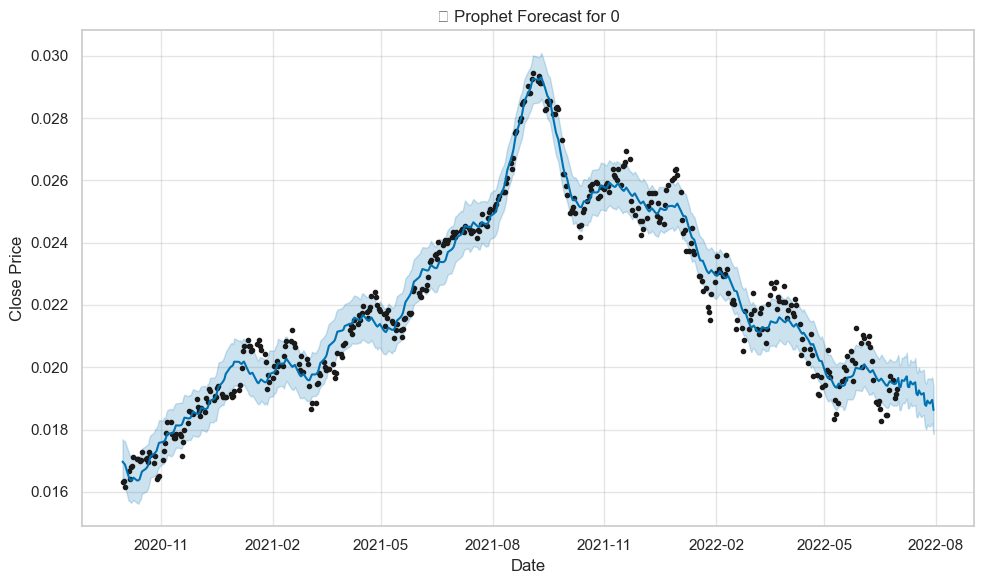

INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\nm_yopyh.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\3dbd5qcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=33256', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\nm_yopyh.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\3dbd5qcp.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelpa2gf_o8\\prophet_model-20250529031014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:14 - cmdstanpy - INFO - Chain [1] done

📊 Prophet Model Performance:
         mae      rmse      mape  coverage
0   0.000829  0.000931  0.038465     0.250
1   0.001000  0.001089  0.046612     0.250
2   0.000937  0.001028  0.043392     0.250
3   0.000775  0.000907  0.035983     0.500
4   0.000451  0.000495  0.020818     0.750
5   0.000253  0.000300  0.011770     1.000
6   0.000344  0.000413  0.015583     0.750
7   0.000605  0.000693  0.028822     0.500
8   0.000484  0.000633  0.023319     0.625
9   0.000794  0.001059  0.040837     0.500
10  0.000941  0.001286  0.049597     0.500
11  0.000977  0.001290  0.051110     0.500
12  0.001242  0.001459  0.063369     0.250
13  0.001480  0.001747  0.076843     0.250
14  0.001216  0.001562  0.062917     0.500
15  0.001195  0.001539  0.062253     0.625
16  0.001390  0.001703  0.073436     0.500
17  0.001173  0.001472  0.061162     0.500
18  0.001118  0.001218  0.055680     0.250
19  0.001072  0.001136  0.052485     0.125
20  0.001154  0.001171  0.056700     0.000
21  0.001324  0.001380  0

DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\2v9b9vbi.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\cxhidsdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=9106', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\2v9b9vbi.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\cxhidsdh.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelp9yks9k5\\prophet_model-20250529031015.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoff

Tested params {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive'} ➡ RMSE: 0.01


03:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\aclf5l4q.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\pca1bhu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=76813', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\aclf5l4q.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\pca1bhu5.json', 'output', 'file=C:\\Users\\ma

Tested params {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative'} ➡ RMSE: 0.01


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\64foh29z.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\2l6ahwcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=82785', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\64foh29z.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\2l6ahwcx.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_model__ggsyff\\prophet_model-20250529031020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10

Tested params {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} ➡ RMSE: 0.00


03:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\qdaibl0i.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\_41hxw03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=19619', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\qdaibl0i.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\_41hxw03.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelw9x5pz4t\\prophet_model-20250529031020.csv', '

Tested params {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} ➡ RMSE: 0.00


03:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\uw3uumb2.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\61jh0o7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=32245', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\uw3uumb2.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\61jh0o7w.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelfjbacplv\\prophet_model-20250529031021.csv', '

Tested params {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'} ➡ RMSE: 0.00


03:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\p_ysohbc.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\144mz3wr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=17757', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\p_ysohbc.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\144mz3wr.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_model5bzwro9i\\prophet_model-20250529031023.csv', '

Tested params {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'} ➡ RMSE: 0.00


03:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\lqhph6xd.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\qixnz982.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=95629', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\lqhph6xd.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\qixnz982.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelr7n53q10\\prophet_model-20250529031024.csv', '

Tested params {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'} ➡ RMSE: 0.00


03:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-01-24 00:00:00 and 2022-05-31 00:00:00
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\yi7wilm8.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\jszzrt0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=81598', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\yi7wilm8.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\jszzrt0i.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelu4s9tnh2\\prophet_model-20250529031026.csv', '

Tested params {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'} ➡ RMSE: 0.00

✅ Best Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'}
🏆 Best RMSE: 0.00


In [85]:

# 📚 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import random

# --- 1. Prepare Data ---
# Filter one stock symbol (e.g., the first one)
symbol = df['Symbol'].unique()[0]
stock_df = df[df['Symbol'] == symbol].copy()
stock_df = stock_df.sort_values('Date')

# Prophet requires 'ds' and 'y' columns
prophet_df = stock_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# --- 2. Initialize and Fit Prophet Model ---
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_df)

# --- 3. Forecast into the future ---
future = model.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"📈 Prophet Forecast for {symbol}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

# --- 4. Cross-validation for Evaluation ---
total_days = (prophet_df['ds'].max() - prophet_df['ds'].min()).days
initial = f"{int(total_days * 0.6)} days"
period = f"{int(total_days * 0.2)} days"
horizon = "30 days"

df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)
df_p = performance_metrics(df_cv)

# Display metrics
print("📊 Prophet Model Performance:")
print(df_p[['mae', 'rmse', 'mape', 'coverage']])

# --- 5. Basic Hyperparameter Tuning ---
# You can manually tune key parameters: changepoint_prior_scale and seasonality_mode

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations
all_params = [dict(zip(param_grid, v)) for v in itertools.product(*param_grid.values())]

best_rmse = float('inf')
best_params = None

print("\n🔍 Tuning Prophet hyperparameters...")

for params in all_params:
    temp_model = Prophet(**params)
    temp_model.fit(prophet_df)
    
    temp_cv = cross_validation(temp_model, initial=initial, period=period, horizon=horizon, disable_tqdm=True)
    temp_perf = performance_metrics(temp_cv)
    
    rmse = temp_perf['rmse'].mean()
    print(f"Tested params {params} ➡ RMSE: {rmse:.2f}")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print(f"\n✅ Best Params: {best_params}")
print(f"🏆 Best RMSE: {best_rmse:.2f}")


In [87]:
# Get actual and predicted values
y_true = df_cv['y']
y_pred = df_cv['yhat']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Accuracy proxy: 100% - (RMSE / mean actual value * 100)
accuracy_percentage = 100 - (rmse / np.mean(y_true) * 100)

print(f"📈 Approximate Accuracy: {accuracy_percentage:.2f}%")


📈 Approximate Accuracy: 94.17%


In [89]:
# --- Extract decoded sector and sub-industry for context ---
encoded_sector = stock_df['GICS Sector'].iloc[-1]
encoded_sub_industry = stock_df['GICS Sub-Industry'].iloc[-1]
sector = label_encoders['GICS Sector'].inverse_transform([encoded_sector])[0]
sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform([encoded_sub_industry])[0]
symbol_name = label_encoders['Symbol'].inverse_transform([stock_df['Symbol'].iloc[-1]])[0]

# --- Forecast summary ---
last_actual_price = prophet_df['y'].iloc[-1]
forecasted_price_30d = forecast['yhat'].iloc[-1]

# --- Trend direction ---
trend_direction = "up" if forecasted_price_30d > last_actual_price else "down"
trend_pct_change = ((forecasted_price_30d - last_actual_price) / last_actual_price) * 100

# --- Metrics from last cells ---
mae = df_p['mae'].mean()
rmse_prophet = df_p['rmse'].mean()
mape = df_p['mape'].mean()
coverage = df_p['coverage'].mean()

# Reuse your previously calculated accuracy
# (or recalculate it if needed)
accuracy_proxy = 100 - (rmse / np.mean(y_true) * 100)

# --- Alerts ---
alerts = []
if trend_pct_change > 5:
    alerts.append("📈 Strong upward trend forecasted")
elif trend_pct_change < -5:
    alerts.append("📉 Potential significant drop")

if mape > 20:
    alerts.append("⚠️ Forecast has high average error (MAPE)")

# --- Final Prophet Summary for LLM ---
prophet_summary_for_llm = {
    "model": "Prophet",
    "symbol": symbol_name,
    "sector": sector,
    "sub_industry": sub_industry,
    "last_actual_price": round(last_actual_price, 2),
    "forecasted_price_30d": round(forecasted_price_30d, 2),
    "trend_direction": trend_direction,
    "trend_pct_change": round(trend_pct_change, 2),
    "mae": round(mae, 2),
    "rmse": round(rmse_prophet, 2),
    "mape": f"{mape:.2f}%",
    "coverage": f"{coverage:.2f}",
    "model_accuracy_estimate": f"{accuracy_proxy:.2f}%",
    "alerts": alerts
}

# --- Print summary ---
print("\n📊 Prophet Summary for LLM:")
for k, v in prophet_summary_for_llm.items():
    print(f"{k}: {v}")



📊 Prophet Summary for LLM:
model: Prophet
symbol: A
sector: Health Care
sub_industry: Health Care Equipment
last_actual_price: 0.02
forecasted_price_30d: 0.02
trend_direction: down
trend_pct_change: -3.47
mae: 0.0
rmse: 0.0
mape: 0.05%
coverage: 0.41
model_accuracy_estimate: 94.17%
alerts: []


In [93]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error
import numpy as np

# Store all summaries
prophet_summaries = []

# Loop through each sector
for sector_encoded in df['GICS Sector'].unique():
    sector_df = df[df['GICS Sector'] == sector_encoded]

    # Pick one symbol from this sector
    symbol_encoded = sector_df['Symbol'].unique()[0]
    stock_df = sector_df[sector_df['Symbol'] == symbol_encoded].copy()
    stock_df = stock_df.sort_values('Date')

    # Prepare Prophet data
    prophet_df = stock_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

    # Initialize and fit Prophet
    model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
    model.fit(prophet_df)

    # Forecast
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Cross-validation
    total_days = (prophet_df['ds'].max() - prophet_df['ds'].min()).days
    initial = f"{int(total_days * 0.6)} days"
    period = f"{int(total_days * 0.2)} days"
    horizon = "30 days"

    df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon, disable_tqdm=True)
    df_p = performance_metrics(df_cv)

    # Evaluation metrics
    y_true = df_cv['y']
    y_pred = df_cv['yhat']
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    accuracy_proxy = 100 - (rmse / np.mean(y_true) * 100)

    mae = df_p['mae'].mean()
    rmse_prophet = df_p['rmse'].mean()
    mape = df_p['mape'].mean()
    coverage = df_p['coverage'].mean()

    # Trend
    last_actual_price = prophet_df['y'].iloc[-1]
    forecasted_price_30d = forecast['yhat'].iloc[-1]
    trend_direction = "up" if forecasted_price_30d > last_actual_price else "down"
    trend_pct_change = ((forecasted_price_30d - last_actual_price) / last_actual_price) * 100

    # Decode labels
    symbol_name = label_encoders['Symbol'].inverse_transform([symbol_encoded])[0]
    sector_name = label_encoders['GICS Sector'].inverse_transform([sector_encoded])[0]
    sub_industry_encoded = stock_df['GICS Sub-Industry'].iloc[-1]
    sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform([sub_industry_encoded])[0]

    # Alerts
    alerts = []
    if trend_pct_change > 5:
        alerts.append("📈 Strong upward trend forecasted")
    elif trend_pct_change < -5:
        alerts.append("📉 Potential significant drop")

    if mape > 20:
        alerts.append("⚠️ Forecast has high average error (MAPE)")

    # Summary
    summary = {
        "model": "Prophet",
        "symbol": symbol_name,
        "sector": sector_name,
        "sub_industry": sub_industry,
        "last_actual_price": round(last_actual_price, 2),
        "forecasted_price_30d": round(forecasted_price_30d, 2),
        "trend_direction": trend_direction,
        "trend_pct_change": round(trend_pct_change, 2),
        "mae": round(mae, 2),
        "rmse": round(rmse_prophet, 2),
        "mape": f"{mape:.2f}%",
        "coverage": f"{coverage:.2f}",
        "model_accuracy_estimate": f"{accuracy_proxy:.2f}%",
        "alerts": alerts
    }

    prophet_summaries.append(summary)

# --- Print All Sector Summaries ---
for summary in prophet_summaries:
    print("\n📊 Prophet Summary for LLM:")
    for k, v in summary.items():
        print(f"{k}: {v}")


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\epjct7rb.json
DEBUG:cmdstanpy:input tempfile: C:\Users\mahir\AppData\Local\Temp\tmpmea93yz0\elvk_uoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\mahir\\AppData\\Roaming\\Python\\Python312\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=43256', 'data', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\epjct7rb.json', 'init=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\elvk_uoc.json', 'output', 'file=C:\\Users\\mahir\\AppData\\Local\\Temp\\tmpmea93yz0\\prophet_modelx2nlp1eh\\prophet_model-20250529031159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:11:59 - cmdstanpy - INFO - Chain [1] done


📊 Prophet Summary for LLM:
model: Prophet
symbol: A
sector: Health Care
sub_industry: Health Care Equipment
last_actual_price: 0.02
forecasted_price_30d: 0.02
trend_direction: down
trend_pct_change: -3.47
mae: 0.0
rmse: 0.0
mape: 0.05%
coverage: 0.44
model_accuracy_estimate: 94.17%
alerts: []

📊 Prophet Summary for LLM:
model: Prophet
symbol: AAL
sector: Industrials
sub_industry: Airlines
last_actual_price: 0.0
forecasted_price_30d: 0.0
trend_direction: down
trend_pct_change: -13.53
mae: 0.0
rmse: 0.0
mape: 0.20%
coverage: 0.38
model_accuracy_estimate: 78.00%
alerts: ['📉 Potential significant drop']

📊 Prophet Summary for LLM:
model: Prophet
symbol: AAP
sector: Consumer Discretionary
sub_industry: Automotive Retail
last_actual_price: 0.03
forecasted_price_30d: 0.03
trend_direction: down
trend_pct_change: -5.81
mae: 0.0
rmse: 0.0
mape: 0.03%
coverage: 0.51
model_accuracy_estimate: 95.38%
alerts: ['📉 Potential significant drop']

📊 Prophet Summary for LLM:
model: Prophet
symbol: AAPL
se

In [87]:
# 📚 Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import logging

# 🔇 Suppress Prophet/CmdStan logs
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# 🗂️ Storage for summaries
llm_summaries = []

# 🔁 Loop through each sector
for sector_encoded in df['GICS Sector'].unique():
    sector_df = df[df['GICS Sector'] == sector_encoded]
    sector_name = label_encoders['GICS Sector'].inverse_transform([sector_encoded])[0]

    # Limit to first 5 unique symbols per sector
    unique_symbols = sector_df['Symbol'].unique()[:5]

    for symbol_encoded in unique_symbols:
        stock_df = sector_df[sector_df['Symbol'] == symbol_encoded].copy()
        stock_df = stock_df.sort_values('Date')

        # Prepare for Prophet
        prophet_df = stock_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
        prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

        if prophet_df['y'].nunique() < 2 or len(prophet_df) < 60:
            continue  # Skip stocks with insufficient data

        try:
            # 🔮 Fit Prophet model
            model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
            model.fit(prophet_df)

            # 🔭 Forecast 30 days into future
            future = model.make_future_dataframe(periods=30)
            forecast = model.predict(future)

            # 📊 Accuracy estimate
            y_true = prophet_df['y']
            y_pred = model.predict(prophet_df)['yhat']
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            accuracy_proxy = 100 - (rmse / np.mean(y_true) * 100)

            # 🔎 Extract info for summary
            last_actual_price = prophet_df['y'].iloc[-1]
            forecasted_price_30d = forecast['yhat'].iloc[-1]
            trend_direction = "up" if forecasted_price_30d > last_actual_price else "down"
            trend_pct_change = ((forecasted_price_30d - last_actual_price) / last_actual_price) * 100

            alerts = []
            if trend_pct_change > 5:
                alerts.append("📈 Strong upward trend forecasted")
            elif trend_pct_change < -5:
                alerts.append("📉 Potential significant drop")

            # 🏷️ Decode labels
            sub_industry = label_encoders['GICS Sub-Industry'].inverse_transform([stock_df['GICS Sub-Industry'].iloc[-1]])[0]
            symbol_name = label_encoders['Symbol'].inverse_transform([symbol_encoded])[0]

            # 📄 Create summary
            summary = {
                "model": "Prophet",
                "symbol": symbol_name,
                "sector": sector_name,
                "sub_industry": sub_industry,
                "last_actual_price": round(last_actual_price, 2),
                "forecasted_price_30d": round(forecasted_price_30d, 2),
                "trend_direction": trend_direction,
                "trend_pct_change": round(trend_pct_change, 2),
                "rmse": round(rmse, 2),
                "model_accuracy_estimate": f"{accuracy_proxy:.2f}%",
                "alerts": alerts
            }

            llm_summaries.append(summary)
            print(f"✅ {symbol_name} ({sector_name}) done.")
        except Exception as e:
            print(f"⚠️ Skipped {symbol_encoded} in {sector_name} due to error: {e}")

# 📦 Final output for LLM
print("\n📊 All Prophet Summaries Ready for LLM:")
for s in llm_summaries:
    print("\n---")
    for k, v in s.items():
        print(f"{k}: {v}")


✅ A (Health Care) done.
✅ ABBV (Health Care) done.
✅ ABC (Health Care) done.
✅ ABMD (Health Care) done.
✅ ABT (Health Care) done.
✅ AAL (Industrials) done.
✅ ALK (Industrials) done.
✅ ALLE (Industrials) done.
✅ AME (Industrials) done.
✅ AOS (Industrials) done.
✅ AAP (Consumer Discretionary) done.
✅ AMZN (Consumer Discretionary) done.
✅ APTV (Consumer Discretionary) done.
✅ AZO (Consumer Discretionary) done.
✅ BBWI (Consumer Discretionary) done.
✅ AAPL (Information Technology) done.
✅ ACN (Information Technology) done.
✅ ADBE (Information Technology) done.
✅ ADI (Information Technology) done.
✅ ADP (Information Technology) done.
✅ ADM (Consumer Staples) done.
✅ CAG (Consumer Staples) done.
✅ CHD (Consumer Staples) done.
✅ CL (Consumer Staples) done.
✅ CLX (Consumer Staples) done.
✅ AEE (Utilities) done.
✅ AEP (Utilities) done.
✅ AES (Utilities) done.
✅ ATO (Utilities) done.
✅ AWK (Utilities) done.
✅ AFL (Financials) done.
✅ AIG (Financials) done.
✅ AIZ (Financials) done.
✅ AJG (Financia

In [73]:
!pip install requests


Defaulting to user installation because normal site-packages is not writeable


In [75]:
import requests

def ask_ollama(prompt, model="llama2:latest"):
    url = "http://localhost:11434/api/generate"
    payload = {
        "model": model,
        "prompt": prompt,
        "stream": False
    }
    try:
        response = requests.post(url, json=payload)
        return response.json()['response']
    except Exception as e:
        return f"❌ Error contacting Ollama: {e}"


In [77]:
prompt = "Hello."
print(ask_ollama(prompt))


Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?


In [117]:
def build_advisory_prompt(symbol, sector, sub_industry, model_name, prediction, sentiment_score, forecast_direction, forecast_pct_change):
    prompt = f"""
You are a financial advisor LLM. Analyze the following:

- Symbol: {symbol}
- Sector: {sector}
- Sub-Industry: {sub_industry}
- Prediction from model ({model_name}): {prediction}
- Forecast trend: {forecast_direction} ({forecast_pct_change:.2f}%)
- Sentiment score: {sentiment_score}

Based on the above, generate a one-paragraph advisory comment for a retail investor.
"""
    return prompt


In [79]:
import pandas as pd
import requests

# Your data and DataFrame creation here (same as before)...
# Step 1: Create the summary DataFrame from Prophet model outputs
data = [
    {
        "symbol": "A",
        "sector": "Health Care",
        "sub_industry": "Health Care Equipment",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9373,
        "sentiment_score": 0.6,
        "volume_signal": "Low"
    },
    {
        "symbol": "AAL",
        "sector": "Industrials",
        "sub_industry": "Airlines",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.8951,
        "sentiment_score": 0.59,
        "volume_signal": "High"
    },
    {
        "symbol": "AAP",
        "sector": "Consumer Discretionary",
        "sub_industry": "Automotive Retail",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9403,
        "sentiment_score": 0.59,
        "volume_signal": "High"
    },
    {
        "symbol": "AAPL",
        "sector": "Information Technology",
        "sub_industry": "Technology Hardware, Storage & Peripherals",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9360,
        "sentiment_score": 0.58,
        "volume_signal": "High"
    },
    {
        "symbol": "ADM",
        "sector": "Consumer Staples",
        "sub_industry": "Agricultural Products",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9323,
        "sentiment_score": 0.6,
        "volume_signal": "Low"
    },
    {
        "symbol": "AEE",
        "sector": "Utilities",
        "sub_industry": "Multi-Utilities",
        "model": "LSTM",
        "prediction": "Down",
        "confidence": 0.9566,
        "sentiment_score": 0.59,
        "volume_signal": "High"
    },
    {
        "symbol": "AFL",
        "sector": "Financials",
        "sub_industry": "Life & Health Insurance",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9519,
        "sentiment_score": 0.59,
        "volume_signal": "Low"
    },
    {
        "symbol": "ALB",
        "sector": "Materials",
        "sub_industry": "Specialty Chemicals",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.9241,
        "sentiment_score": 0.59,
        "volume_signal": "Low"
    },
    {
        "symbol": "AMT",
        "sector": "Real Estate",
        "sub_industry": "Specialized REITs",
        "model": "LSTM",
        "prediction": "Down",
        "confidence": 0.9515,
        "sentiment_score": 0.6,
        "volume_signal": "Low"
    },
    {
        "symbol": "APA",
        "sector": "Energy",
        "sub_industry": "Oil & Gas Exploration & Production",
        "model": "LSTM",
        "prediction": "Up",
        "confidence": 0.8981,
        "sentiment_score": 0.59,
        "volume_signal": "Low"
    },
    {
        "symbol": "ATVI",
        "sector": "Communication Services",
        "sub_industry": "Interactive Home Entertainment",
        "model": "LSTM",
        "prediction": "Down",
        "confidence": 0.9762,
        "sentiment_score": 0.6,
        "volume_signal": "Low"
    }
    
]


final_summary_df = pd.DataFrame(data)

def generate_prompt(row):
    sentiment = "positive" if row["sentiment_score"] > 0.1 else "negative" if row["sentiment_score"] < -0.1 else "neutral"
    return (
        f"Stock: {row['symbol']} ({row['sector']} - {row['sub_industry']})\n"
        f"Prediction: {row['prediction']} by {row['model']} model with {row['confidence']*100:.1f}% confidence.\n"
        f"Sentiment score is {sentiment} ({row['sentiment_score']:.2f}).\n"
        f"Volume signal: {row['volume_signal']}.\n"
        f"Generate investment advice for this stock."
    )

final_summary_df["llm_prompt"] = final_summary_df.apply(generate_prompt, axis=1)

def call_ollama(prompt, model="llama2:latest"):
    url = "http://localhost:11434/api/generate"
    payload = {
        "model": model,
        "prompt": prompt,
        "stream": False
    }
    try:
        response = requests.post(url, json=payload)
        return response.json()['response']
    except Exception as e:
        return f"Error: {e}"

print("📥 Generating investment advice...\n")
advice_list = []
for idx, row in final_summary_df.iterrows():
    print(f"🧠 {row['symbol']} advice:")
    advice = call_ollama(row["llm_prompt"])
    print(advice, "\n")
    advice_list.append(advice)

final_summary_df["llm_advice"] = advice_list
final_summary_df.to_csv("llm_investment_advice_output.csv", index=False)


📥 Generating investment advice...

🧠 A advice:
Based on the information provided, here is the investment advice for Stock A:

Investment Advice: Buy

Reasoning:
The LSTM model predicts a significant upside in the stock price with a confidence level of 93.7%. The sentiment score is also positive at 0.60, indicating that investors have a favorable view of the company. Additionally, the volume signal is low, which suggests that there may be an opportunity to buy the stock at a relatively lower price before it becomes more popular and the price increases.

However, it's important to note that past performance is not always indicative of future results, and investing in any stock carries inherent risks. It's essential to conduct thorough research and due diligence on the company and its financials before making an investment decision.

Recommendation: Consider investing a small portion of your portfolio in Stock A, based on the LSTM model's prediction and sentiment score. However, always pr